<a href="https://colab.research.google.com/github/THESHAMIK/Real-Life-Projects/blob/main/H2O/KHDS_H2O_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we tried to take out outliers.Hence input file data is take out where y=product sulphur >9.
Output file data is also taken out where y=product sulphur >9

In [ ]:
#!nvidia-smi
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 21 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=89e4975ba8d4a7d8391bde4a25f503d9df91fc709a8a91442f463098e03796a3
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
from google.colab import files

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6pk64gk0
  JVM stdout: /tmp/tmp6pk64gk0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6pk64gk0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,"28 days, 16 hours and 10 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_22uz0e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
uploaded = files.upload()

Saving khds_final_3.csv to khds_final_3.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "khds_final_3.csv" with length 256995 bytes


khds_final_3.csv has values less than 9 (or <=8) for Product Sulphur.
khds_final_2.csv has values less than 20 for Product Sulphur.
khds_final_1.csv had all values even 184.
Those r now taken off to check for r2.

In [ ]:
# Load data into H2O
df = h2o.import_file("khds_final_3.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df

LABfeed Sulphur,T1 : FRESH FEED FLOW TO KHDS KGPerHour,T1 : Reactor inlet temperature DEGC,T1 : Hydrogen make-up flow NM3perHour,T1 : Recycle hydrogen flow NM3perHour,T1 : REACTOR OUTLET Temp DEGC,T1 : REACTOR FEED INLET Pressure KGperCM2,T1 : Cold separator pressure KGperCM2,T1 : KERO FEED DENSITY KGperCM2,T2 : FRESH FEED FLOW TO KHDS KGPerHour,T2 : Reactor inlet temperature DEGC,T2 : Hydrogen make-up flow NM3perHour,T2 : Recycle hydrogen flow NM3perHour,T2 : REACTOR OUTLET Temp DEGC,T2 : REACTOR FEED INLET Pressure KGperCM2,T2 : Cold separator pressure KGperCM2,T2 : KERO FEED DENSITY KGperCM2,T3 : FRESH FEED FLOW TO KHDS KGPerHour,T3 : Reactor inlet temperature DEGC,T3 : Hydrogen make-up flow NM3perHour,T3 : Recycle hydrogen flow NM3perHour,T3 : REACTOR OUTLET Temp DEGC,T3 : REACTOR FEED INLET Pressure KGperCM2,T3 : Cold separator pressure KGperCM2,T3 : KERO FEED DENSITY KGperCM2,T4 : FRESH FEED FLOW TO KHDS KGPerHour,T4 : Reactor inlet temperature DEGC,T4 : Hydrogen make-up flow NM3perHour,T4 : Recycle hydrogen flow NM3perHour,T4 : REACTOR OUTLET Temp DEGC,T4 : REACTOR FEED INLET Pressure KGperCM2,T4 : Cold separator pressure KGperCM2,T4 : KERO FEED DENSITY KGperCM2,Product Sulphur
1100,48231.5,283.093,514.075,15954.9,287.005,20.3516,18.5606,698.236,48346.1,283.062,456.745,15920.3,287.785,20.3615,18.6062,698.526,48385.8,283.378,353.904,15609.9,288.431,20.5521,18.7493,698.681,48414.7,282.738,531.2,15728.4,287.942,20.329,18.5643,698.34,8
1500,36449.3,274.594,316.412,12108.2,275.296,20.132,18.5913,695.804,36329.5,273.892,305.791,12148.3,275.218,20.1816,18.6188,693.865,36357.2,274.225,304.434,12234.1,275.227,20.1854,18.6147,693.592,36379.2,274.939,326.939,12343.3,275.55,20.1624,18.5957,693.012,8
2500,75702.4,290.854,918.878,14259.5,293.534,21.9313,18.6008,700.438,75839,290.337,945.996,14372.5,293.679,21.9011,18.5609,698.443,75802.3,290.273,804.292,14399.1,293.11,22.0104,18.6383,697.594,75611.7,290.382,882.089,14582,292.736,21.9624,18.5922,695.942,8
2400,75016.9,293.014,946.713,14841.3,295.554,22.0107,18.5924,700.853,75880.2,293.039,918.24,14833,295.63,22.0429,18.6026,700.537,75638.3,292.928,936.86,14789.5,295.583,22.042,18.6027,700.732,75883.2,292.965,933.633,14763.4,295.378,22.0242,18.5925,701.107,8
2400,75073.5,294.037,916.877,15155.9,296.598,22.028,18.6234,710.62,75538.4,295.288,961.888,15123.7,297.227,22.0066,18.6135,711.326,75366,295.055,906.252,15073.7,297.77,21.9939,18.5877,711.405,75327.3,294.905,932.258,15141.3,297.526,22.0323,18.616,710.898,8
2300,68444.3,289.151,824.678,16129.5,291.203,21.9296,18.5944,709.945,68491.3,288.941,824.472,16137,291.288,21.9421,18.6029,709.965,68422.3,289.075,841.509,16151,291.422,21.9421,18.5855,709.781,68112.5,289.035,815.045,16156.1,291.354,21.9586,18.6139,709.816,8
2000,73323.9,292.352,909.951,16064.8,294.358,22.1411,18.5983,708.588,73347.2,292.585,916.971,16106.1,295.034,22.1286,18.591,708.151,73241.7,292.406,916.833,16127.6,295.038,22.1556,18.6044,707.524,73405,292.62,928.943,16113.6,294.815,22.1388,18.5962,708.25,8
2300,53092.4,287.119,582.959,12236.4,289.177,20.747,18.5637,707.132,55671.9,287.514,574.43,12170.7,289.419,20.8483,18.6076,710.48,56140.6,287.625,608.813,12099.1,289.567,20.8285,18.5872,710.502,55675.6,287.509,558.027,12133.3,289.889,20.8453,18.5974,709.642,8
2100,75691,291.014,789.032,15536.4,292.321,22.2623,18.6259,696.381,75544.8,291.038,807.524,15552.8,292.343,22.2679,18.6241,696.09,75502,291.052,823.519,15508.5,292.322,22.2288,18.6028,696.429,75489.1,291,813.384,15463.9,292.285,22.2182,18.5966,697.183,8
2500,84822.4,296.077,950.764,15015.5,298.499,22.5112,18.6275,698.284,85386.7,296.07,981.668,14948,298.018,22.4657,18.6034,698.284,84462.4,295.998,970.256,14905.9,298.296,22.4313,18.5943,698.284,84623.5,295.982,980.288,15013.9,298.477,22.4726,18.596,698.284,8


In [ ]:
df.types

{'LABfeed Sulphur': 'real',
 'Product Sulphur': 'real',
 'T1 : Cold separator pressure KGperCM2': 'real',
 'T1 : FRESH FEED FLOW TO KHDS KGPerHour': 'real',
 'T1 : Hydrogen make-up flow NM3perHour': 'real',
 'T1 : KERO FEED DENSITY KGperCM2': 'real',
 'T1 : REACTOR FEED INLET Pressure KGperCM2': 'real',
 'T1 : REACTOR OUTLET Temp DEGC': 'real',
 'T1 : Reactor inlet temperature DEGC': 'real',
 'T1 : Recycle hydrogen flow NM3perHour': 'real',
 'T2 : Cold separator pressure KGperCM2': 'real',
 'T2 : FRESH FEED FLOW TO KHDS KGPerHour': 'real',
 'T2 : Hydrogen make-up flow NM3perHour': 'real',
 'T2 : KERO FEED DENSITY KGperCM2': 'real',
 'T2 : REACTOR FEED INLET Pressure KGperCM2': 'real',
 'T2 : REACTOR OUTLET Temp DEGC': 'real',
 'T2 : Reactor inlet temperature DEGC': 'real',
 'T2 : Recycle hydrogen flow NM3perHour': 'real',
 'T3 : Cold separator pressure KGperCM2': 'real',
 'T3 : FRESH FEED FLOW TO KHDS KGPerHour': 'real',
 'T3 : Hydrogen make-up flow NM3perHour': 'real',
 'T3 : KERO FEE

In [ ]:
df.describe()

Rows:668
Cols:34




,LABfeed Sulphur,T1 : FRESH FEED FLOW TO KHDS KGPerHour,T1 : Reactor inlet temperature DEGC,T1 : Hydrogen make-up flow NM3perHour,T1 : Recycle hydrogen flow NM3perHour,T1 : REACTOR OUTLET Temp DEGC,T1 : REACTOR FEED INLET Pressure KGperCM2,T1 : Cold separator pressure KGperCM2,T1 : KERO FEED DENSITY KGperCM2,T2 : FRESH FEED FLOW TO KHDS KGPerHour,T2 : Reactor inlet temperature DEGC,T2 : Hydrogen make-up flow NM3perHour,T2 : Recycle hydrogen flow NM3perHour,T2 : REACTOR OUTLET Temp DEGC,T2 : REACTOR FEED INLET Pressure KGperCM2,T2 : Cold separator pressure KGperCM2,T2 : KERO FEED DENSITY KGperCM2,T3 : FRESH FEED FLOW TO KHDS KGPerHour,T3 : Reactor inlet temperature DEGC,T3 : Hydrogen make-up flow NM3perHour,T3 : Recycle hydrogen flow NM3perHour,T3 : REACTOR OUTLET Temp DEGC,T3 : REACTOR FEED INLET Pressure KGperCM2,T3 : Cold separator pressure KGperCM2,T3 : KERO FEED DENSITY KGperCM2,T4 : FRESH FEED FLOW TO KHDS KGPerHour,T4 : Reactor inlet temperature DEGC,T4 : Hydrogen make-up flow NM3perHour,T4 : Recycle hydrogen flow NM3perHour,T4 : REACTOR OUTLET Temp DEGC,T4 : REACTOR FEED INLET Pressure KGperCM2,T4 : Cold separator pressure KGperCM2,T4 : KERO FEED DENSITY KGperCM2,Product Sulphur
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
mean,1776.905089820359,63314.40508470061,283.97695616347306,646.8202138077845,14414.900115221557,286.52807027335325,21.276697861002994,18.402634207604788,652.1272725193114,63278.39232146708,283.9633725497006,652.4156452502995,14415.848439579342,286.52535481946114,21.272406920688624,18.39601665329341,653.1027175943115,63236.316444281445,283.93944277170664,652.3273825264971,14408.789723458087,286.5145373637724,21.27472088597305,18.40007884956587,653.1864497326347,63501.848926946106,283.9342216859281,655.5613012453593,14415.74870829491,286.4768460946108,21.268505768023953,18.39429128441617,653.1824495573354,3.5362275449101794
maxs,2800.0,98498.06148,297.4440885,1165.721084,17632.62066,301.8797725,22.98139692,19.52880859,779.3384399,97940.85523,297.641066,1204.491089,17638.2272,303.3064886,22.94129547,19.508255,779.3275757,98646.51344,297.5687919,1290.212767,17672.37561,302.3586859,22.96193024,19.47885132,779.2910767,98469.0138,297.6897095,1223.010006,17685.20946,301.468252,22.94070015,19.49668884,779.0015948,8.0
sigma,427.1223920086189,23015.218529437174,30.46515522879852,239.7133214420809,1999.053783304368,28.46196542858599,2.328864835122239,1.8975785987566465,184.06455940042537,23028.525331202065,30.465537039167447,241.09217761764342,1993.9391990393417,28.46274507722938,2.3282450653603557,1.8968161247838633,182.3116554578296,23053.040486966318,30.46909528032476,243.71624198037108,1995.8707639503127,28.461804918956066,2.3267335318225437,1.8973238425117078,182.33634235427036,22735.150066511753,30.467584111259,240.41991998314032,1998.791449130735,28.460770379308027,2.326930388594918,1.8966050231614993,182.33117967617198,1.7549942842217277
zeros,0,10,7,7,6,6,6,7,49,10,7,7,6,6,6,7,48,10,7,7,6,6,6,7,48,8,7,7,6,6,6,7,48,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1100.0,48231.50266,283.0930316,514.074794,15954.91269,287.0050354,20.35157724,18.56063843,698.2361865,48346.14805,283.0615582,456.7449252,15920.30162,287.7850391,20.36150507,18.60618591,698.5261072,48385.75063,283.3776709,353.9038504,15609.93682,288.4306641,20.5520809,18.74931335,698.6806287,48414.68449,282.7379633,531.1995779,15728.41277,287.9424133,20.32902309,18.56428528,698.3403625,8.0
1,1500.0,36449.30047,274.5941846,316.4122046,12108.17961,275.2961121,20.13202164,18.59130859,695.804126,36329.47031,273.8918176,305.7912256,12148.29477,275.2180359,20.1815551,18.61883545,693.8651733,36357.20563,274.2246228,304.4342151,12234.11781,275.2270081,20.18

In [ ]:
#Splitting the dataset into train and test datasets
splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [ ]:
y = "Product Sulphur"
x = df.columns
#x.remove((y), axis =1)
x.remove(y)

In [ ]:
y

'Product Sulphur'

In [ ]:
aml = H2OAutoML(max_runtime_secs=1200, verbosity="info")        
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |
10:02:54.867: Project: AutoML_2_20220512_100254
10:02:54.867: 5-fold cross-validation will be used.
10:02:54.868: Setting stopping tolerance adaptively based on the training frame: 0.043355498476206
10:02:54.868: Build control seed: -1 (random)
10:02:54.868: training frame: Frame key: AutoML_2_20220512_100254_training_py_2_sid_a9ae    cols: 34    rows: 532  chunks: 8    size: 134447  checksum: -8637068135983584011
10:02:54.868: validation frame: NULL
10:02:54.868: leaderboard frame: NULL
10:02:54.869: blending frame: NULL
10:02:54.869: response column: Product Sulphur
10:02:54.869: fold column: null
10:02:54.869: weights column: null
10:02:54.881: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.023520,0.044916,0.980065,1.085990,1.034454,0.979297,1.037794
1,mean_residual_deviance,1.792828,0.270767,1.492814,2.024226,2.053976,1.519119,1.874005
2,mse,1.792828,0.270767,1.492814,2.024226,2.053976,1.519119,1.874005
3,null_deviance,348.752000,49.519295,299.696170,349.202480,364.177150,307.837520,422.846770
4,r2,0.443839,0.067080,0.506108,0.356412,0.390156,0.498882,0.467640
5,residual_deviance,192.047320,39.392372,146.295730,224.689010,221.829390,151.911880,215.510560
6,rmse,1.335840,0.102225,1.221807,1.422753,1.433170,1.232525,1.368943
7,rmsle,0.305547,0.019673,0.291942,0.326021,0.314042,0.317274,0.278453


In [ ]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_2_20220512_100254,1.34349,1.80496,1.02554,0.305909,1.80496
StackedEnsemble_BestOfFamily_6_AutoML_2_20220512_100254,1.34651,1.8131,1.03226,0.3069,1.8131
StackedEnsemble_AllModels_4_AutoML_2_20220512_100254,1.34705,1.81454,1.04446,0.310212,1.81454
XRT_1_AutoML_2_20220512_100254,1.34975,1.82183,1.05405,0.311757,1.82183
StackedEnsemble_BestOfFamily_3_AutoML_2_20220512_100254,1.34982,1.82202,1.03455,0.309503,1.82202
StackedEnsemble_BestOfFamily_7_AutoML_2_20220512_100254,1.35117,1.82567,1.0355,0.308842,1.82567
StackedEnsemble_AllModels_6_AutoML_2_20220512_100254,1.35439,1.83436,1.03908,0.311533,1.83436
StackedEnsemble_Best1000_1_AutoML_2_20220512_100254,1.35743,1.84263,1.04881,0.311851,1.84263
StackedEnsemble_AllModels_2_AutoML_2_20220512_100254,1.35836,1.84513,1.04566,0.31037,1.84513
StackedEnsemble_BestOfFamily_2_AutoML_2_20220512_100254,1.3588,1.84634,1.03745,0.309623,1.84634


**PASS 1 ::**
model_id	rmse	mse	mae	rmsle	mean_residual_deviance
StackedEnsemble_BestOfFamily_7_AutoML_1_20220418_60039	3.50567	12.2897	1.60071	0.393672	12.2897

DeepLearning_grid_2_AutoML_1_20220418_60039_model_2	3.51586	12.3613	1.59708	0.386981	12.3613

StackedEnsemble_AllModels_4_AutoML_1_20220418_60039	3.69823	13.6769	1.53466	0.38588	13.6769
DeepLearning_grid_2_AutoML_1_20220418_60039_model_1	3.74475	14.0232	1.70962	0.421668	14.0232
StackedEnsemble_AllModels_5_AutoML_1_20220418_60039	3.78379	14.317	1.62764	0.412418	14.317
StackedEnsemble_AllModels_6_AutoML_1_20220418_60039	3.88503	15.0935	1.62936	nan	15.0935
StackedEnsemble_BestOfFamily_5_AutoML_1_20220418_60039	3.90377	15.2394	1.64613	0.407061	15.2394
DeepLearning_grid_3_AutoML_1_20220418_60039_model_2	3.93686	15.4988	1.64561	0.398551	15.4988
DeepLearning_grid_1_AutoML_1_20220418_60039_model_1	3.93734	15.5026	1.66323	nan	15.5026
GBM_4_AutoML_1_20220418_60039	4.04339	16.349	1.68982	0.423334	16.349


**PASS 2:: best models top10**
model_id	rmse	mse	mae	rmsle	mean_residual_deviance
StackedEnsemble_BestOfFamily_6_AutoML_1_20220512_60119	1.89795	3.60222	1.28609	0.35518	3.60222
StackedEnsemble_BestOfFamily_4_AutoML_1_20220512_60119	1.89971	3.6089	1.28583	0.354756	3.6089
StackedEnsemble_AllModels_6_AutoML_1_20220512_60119	1.90143	3.61543	1.2867	0.351638	3.61543
GBM_2_AutoML_1_20220512_60119	1.90826	3.64146	1.29957	0.360065	3.64146
StackedEnsemble_BestOfFamily_2_AutoML_1_20220512_60119	1.91431	3.66459	1.30468	0.358848	3.66459
StackedEnsemble_AllModels_1_AutoML_1_20220512_60119	1.91616	3.67165	1.29698	0.355381	3.67165
StackedEnsemble_AllModels_2_AutoML_1_20220512_60119	1.92134	3.69155	1.30709	0.355326	3.69155
StackedEnsemble_BestOfFamily_3_AutoML_1_20220512_60119	1.92319	3.69867	1.2977	0.354896	3.69867
GBM_grid_1_AutoML_1_20220512_60119_model_2	1.92482	3.70492	1.307	0.352756	3.70492
GBM_4_AutoML_1_20220512_60119	1.9253	3.70677	1.3107	0.360342	3.70677

PASS 3::
model_id	rmse	mse	mae	rmsle	mean_residual_deviance
StackedEnsemble_BestOfFamily_6_AutoML_1_20220512_74601	1.3443	1.80714	1.03041	0.307562	1.80714
GBM_grid_1_AutoML_1_20220512_74601_model_2	1.34847	1.81837	1.03478	0.308196	1.81837
StackedEnsemble_BestOfFamily_4_AutoML_1_20220512_74601	1.35159	1.8268	1.02826	0.310368	1.8268
StackedEnsemble_BestOfFamily_2_AutoML_1_20220512_74601	1.35313	1.83095	1.03297	0.311247	1.83095
StackedEnsemble_AllModels_2_AutoML_1_20220512_74601	1.35314	1.831	1.0319	0.31088	1.831
StackedEnsemble_AllModels_1_AutoML_1_20220512_74601	1.35374	1.83261	1.02875	0.310689	1.83261
DRF_1_AutoML_1_20220512_74601	1.3578	1.84363	1.03861	0.314102	1.84363
StackedEnsemble_BestOfFamily_3_AutoML_1_20220512_74601	1.3589	1.84662	1.03404	0.312032	1.84662
GBM_grid_1_AutoML_1_20220512_74601_model_5	1.36024	1.85026	1.03934	0.314053	1.85026
GBM_grid_1_AutoML_1_20220512_74601_model_6	1.36173	1.85432	1.0455	0.313281	1.85432


**PASS 1 :: Metrics**
ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 9.309600903167086
RMSE: 3.051163860425573
MAE: 1.3178897499166857
RMSLE: 0.327706169149253
Mean Residual Deviance: 9.309600903167086

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 12.805186068066176
RMSE: 3.5784334656475276
MAE: 1.5356561755395013
RMSLE: 0.37276875522254027
Mean Residual Deviance: 12.805186068066176

**PASS 2 METRICS ::**
ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.5274332885837466
RMSE: 0.7262460248316315
MAE: 0.5049443854681339
RMSLE: 0.14431490318093648
R^2: 0.929789610287499
Mean Residual Deviance: 0.5274332885837466
Null degrees of freedom: 562
Residual degrees of freedom: 559
Null deviance: 4229.358969357469
Residual deviance: 296.94494147264936
AIC: 1247.555172011303

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 3.6022188207340156
RMSE: 1.8979512166370387
MAE: 1.2860915864189766
RMSLE: 0.35518023281401784
**R^2: 0.52048**30777508214
Mean Residual Deviance: 3.6022188207340156
Null degrees of freedom: 562
Residual degrees of freedom: 559
Null deviance: 4238.053851311581
Residual deviance: 2028.0491960732506
AIC: 2329.2374354022622


PASS3 METRICS ::
ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.41421249798910026
RMSE: 0.6435934259989766
MAE: 0.48063986446137663
RMSLE: 0.1502676937312396
R^2: 0.8729070438643908
Mean Residual Deviance: 0.41421249798910026
Null degrees of freedom: 531
Residual degrees of freedom: 525
Null deviance: 1733.8572933583696
Residual deviance: 220.36104893020135
AIC: 1056.8584839796717

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 1.8071382543168424
RMSE: 1.3442984245757497
MAE: 1.030413802738057
RMSLE: 0.307562250963267
R^2: 0.44551517879859925
Mean Residual Deviance: 1.8071382543168424
Null degrees of freedom: 531
Residual degrees of freedom: 525
Null deviance: 1741.6730827470444
Residual deviance: 961.3975512965601
AIC: 1840.5586834891758

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids 

['StackedEnsemble_BestOfFamily_4_AutoML_2_20220512_100254',
 'StackedEnsemble_BestOfFamily_6_AutoML_2_20220512_100254',
 'StackedEnsemble_AllModels_4_AutoML_2_20220512_100254',
 'XRT_1_AutoML_2_20220512_100254',
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20220512_100254',
 'StackedEnsemble_BestOfFamily_7_AutoML_2_20220512_100254',
 'StackedEnsemble_AllModels_6_AutoML_2_20220512_100254',
 'StackedEnsemble_Best1000_1_AutoML_2_20220512_100254',
 'StackedEnsemble_AllModels_2_AutoML_2_20220512_100254',
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20220512_100254',
 'StackedEnsemble_AllModels_3_AutoML_2_20220512_100254',
 'GBM_grid_1_AutoML_2_20220512_100254_model_21',
 'DRF_1_AutoML_2_20220512_100254',
 'GBM_grid_1_AutoML_2_20220512_100254_model_7',
 'GBM_grid_1_AutoML_2_20220512_100254_model_20',
 'GBM_grid_1_AutoML_2_20220512_100254_model_10',
 'GBM_grid_1_AutoML_2_20220512_100254_model_16',
 'StackedEnsemble_AllModels_1_AutoML_2_20220512_100254',
 'GBM_grid_1_AutoML_2_20220512_100254_model_1

In [ ]:
pred=aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
pred.head()

predict
5.32439
5.91889
4.59203
4.42527
6.31436
4.41826
3.30664
3.94871
4.42222
5.78397


In [ ]:
aml.leader.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 1.1755936795981878
RMSE: 1.0842479788305754
MAE: 0.8530532685259542
RMSLE: 0.25785329027244025
R^2: 0.4997413848072042
Mean Residual Deviance: 1.1755936795981878
Null degrees of freedom: 135
Residual degrees of freedom: 130
Null deviance: 320.7385861862916
Residual deviance: 159.88074042535354
AIC: 421.9524470067001


In [ ]:
#out = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily_7_AutoML_1_20220418_60039" in mid][0])
#DeepLearning_grid_3_AutoML_1_20220511_93953_model_1
out = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily_4_AutoML_2_20220512_100254" in mid][0])

In [ ]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XRT_1_AutoML_2_20220512_100254',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'DRF_1_AutoML_2_20220512_100254',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_grid_1_AutoML_2_20220512_100254_model_7',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_grid_1_AutoML_2_20220512_100254_model_1',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},

In [ ]:
out

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_2_20220512_100254

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.3863875627295977
RMSE: 0.6216008065709034
MAE: 0.4551848580030198
RMSLE: 0.14071384730178585
R^2: 0.881444577844124
Mean Residual Deviance: 0.3863875627295977
Null degrees of freedom: 531
Residual degrees of freedom: 526
Null deviance: 1733.8572933583696
Residual deviance: 205.55818337214598
AIC: 1017.8641573016016

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 1.8049559822583805
RMSE: 1.3434865024474123
MAE: 1.0255420681894594
RMSLE: 0.30590949932069356
R^2: 0.4461847660475319
Mean Residual Deviance: 1.8049559822583805
Null degrees of freedom: 531
Residual degrees of freedom: 527
Null deviance: 1743.7600886193136
Residual deviance: 960.2365825614585
AIC: 1835.9158603509534

Cross-Validation Metrics Su

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.023520,0.044916,0.980065,1.085990,1.034454,0.979297,1.037794
1,mean_residual_deviance,1.792828,0.270767,1.492814,2.024226,2.053976,1.519119,1.874005
2,mse,1.792828,0.270767,1.492814,2.024226,2.053976,1.519119,1.874005
3,null_deviance,348.752000,49.519295,299.696170,349.202480,364.177150,307.837520,422.846770
4,r2,0.443839,0.067080,0.506108,0.356412,0.390156,0.498882,0.467640
5,residual_deviance,192.047320,39.392372,146.295730,224.689010,221.829390,151.911880,215.510560
6,rmse,1.335840,0.102225,1.221807,1.422753,1.433170,1.232525,1.368943
7,rmsle,0.305547,0.019673,0.291942,0.326021,0.314042,0.317274,0.278453


In [ ]:
# Get a specific model by model ID
m = h2o.get_model("StackedEnsemble_BestOfFamily_7_AutoML_1_20220418_60039")

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_BestOfFamily_6_AutoML_1_20220512_60119,1.89795,3.60222,1.28609,0.35518,3.60222,546,0.069312,StackedEnsemble,15.2373
StackedEnsemble_BestOfFamily_4_AutoML_1_20220512_60119,1.89971,3.6089,1.28583,0.354756,3.6089,131,0.060413,StackedEnsemble,15.9506
StackedEnsemble_AllModels_6_AutoML_1_20220512_60119,1.90143,3.61543,1.2867,0.351638,3.61543,1934,0.367095,StackedEnsemble,17.0177
GBM_2_AutoML_1_20220512_60119,1.90826,3.64146,1.29957,0.360065,3.64146,772,0.015629,GBM,15.7035
StackedEnsemble_BestOfFamily_2_AutoML_1_20220512_60119,1.91431,3.66459,1.30468,0.358848,3.66459,140,0.079428,StackedEnsemble,15.0959
StackedEnsemble_AllModels_1_AutoML_1_20220512_60119,1.91616,3.67165,1.29698,0.355381,3.67165,149,0.050978,StackedEnsemble,15.6411
StackedEnsemble_AllModels_2_AutoML_1_20220512_60119,1.92134,3.69155,1.30709,0.355326,3.69155,168,0.062365,StackedEnsemble,15.8683
StackedEnsemble_BestOfFamily_3_AutoML_1_20220512_60119,1.92319,3.69867,1.2977,0.354896,3.69867,245,0.038513,StackedEnsemble,15.7688
GBM_grid_1_AutoML_1_20220512_60119_model_2,1.92482,3.70492,1.307,0.352756,3.70492,242,0.018768,GBM,16.1638
GBM_4_AutoML_1_20220512_60119,1.9253,3.70677,1.3107,0.360342,3.70677,866,0.024458,GBM,16.9462


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

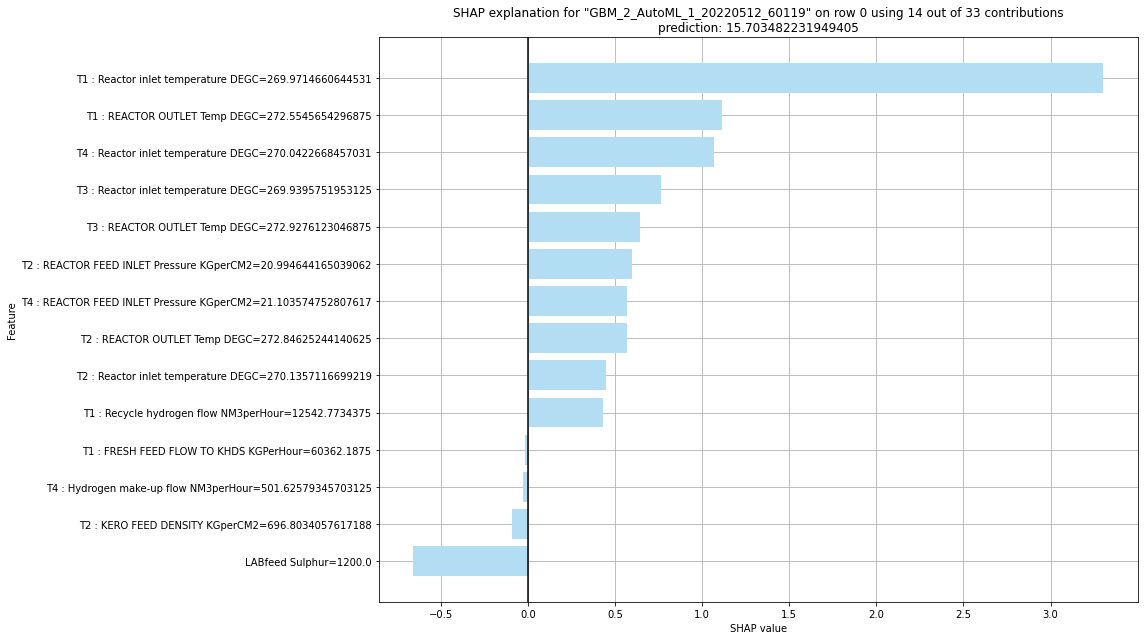

/usr/local/lib/python3.7/dist-packages/h2o/explanation/_explain.py:3175: UserWarning: No model with variable importance. Selecting all features to explain.
  warnings.warn("No model with variable importance. Selecting all features to explain.")


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

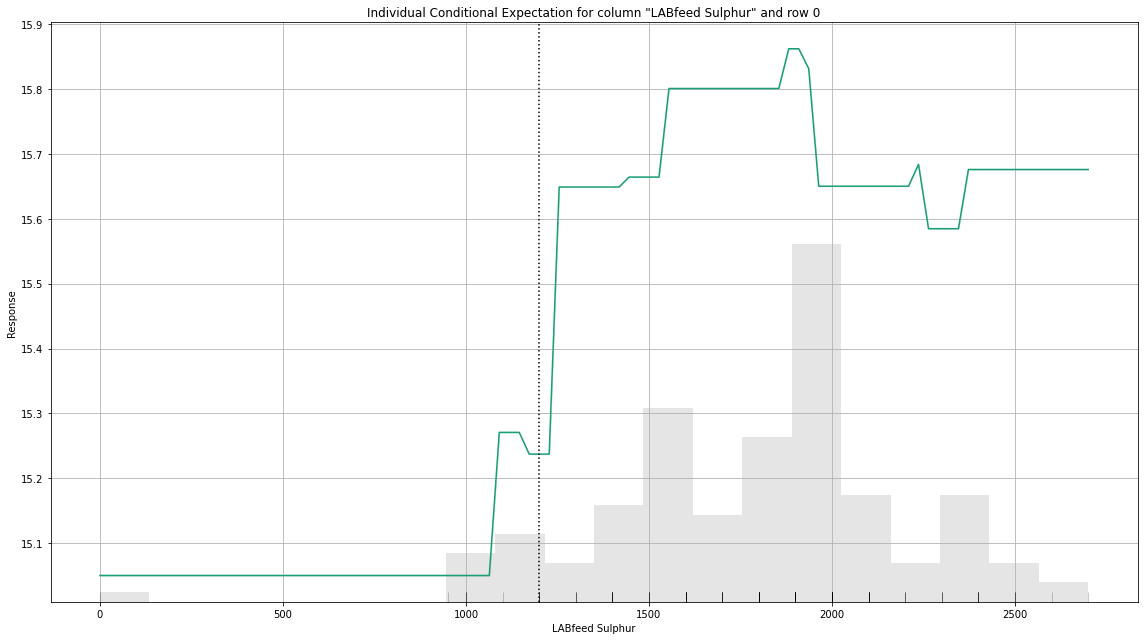

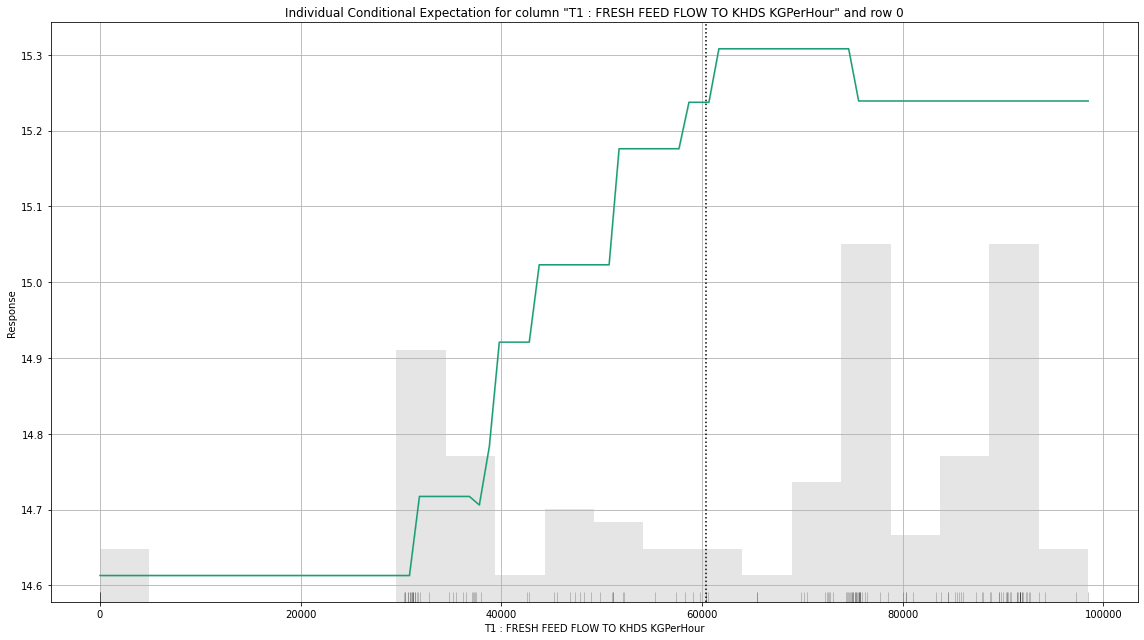

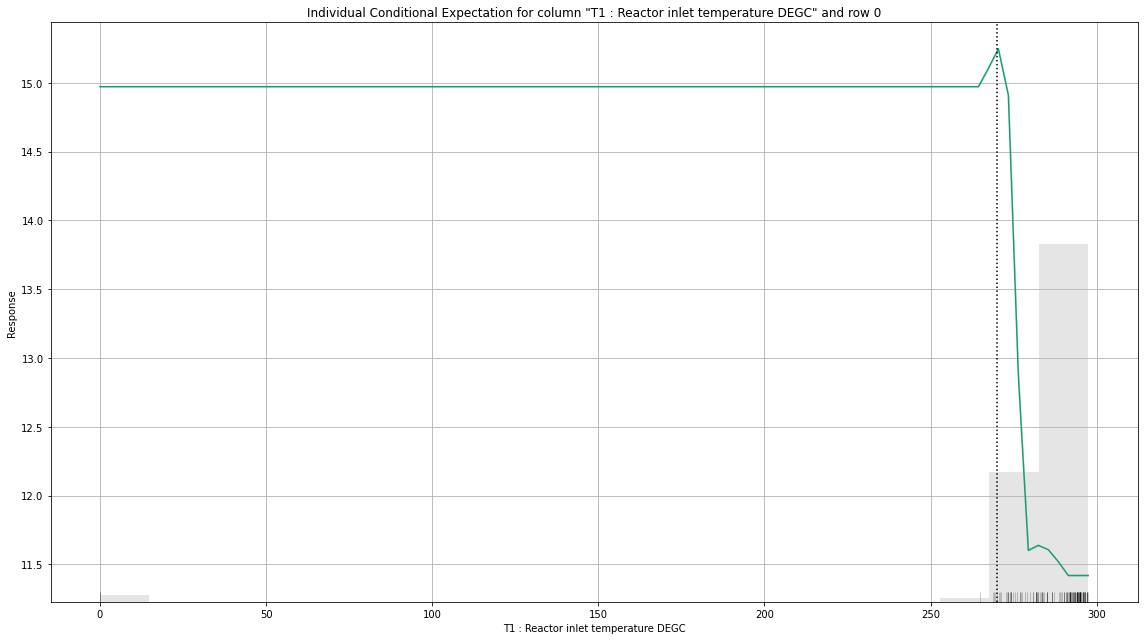

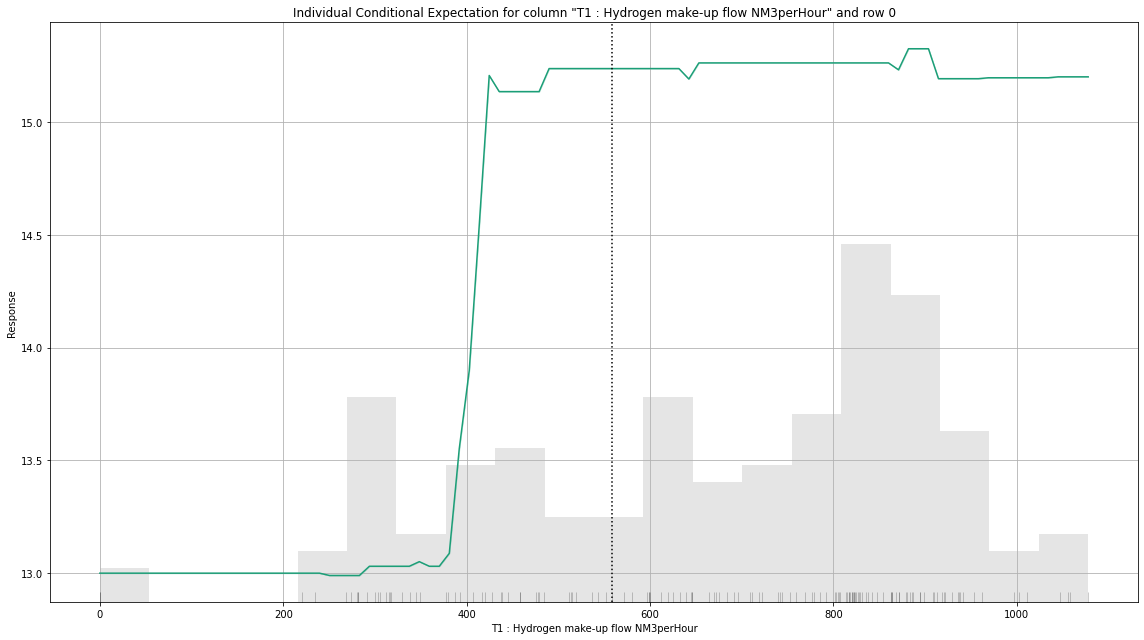

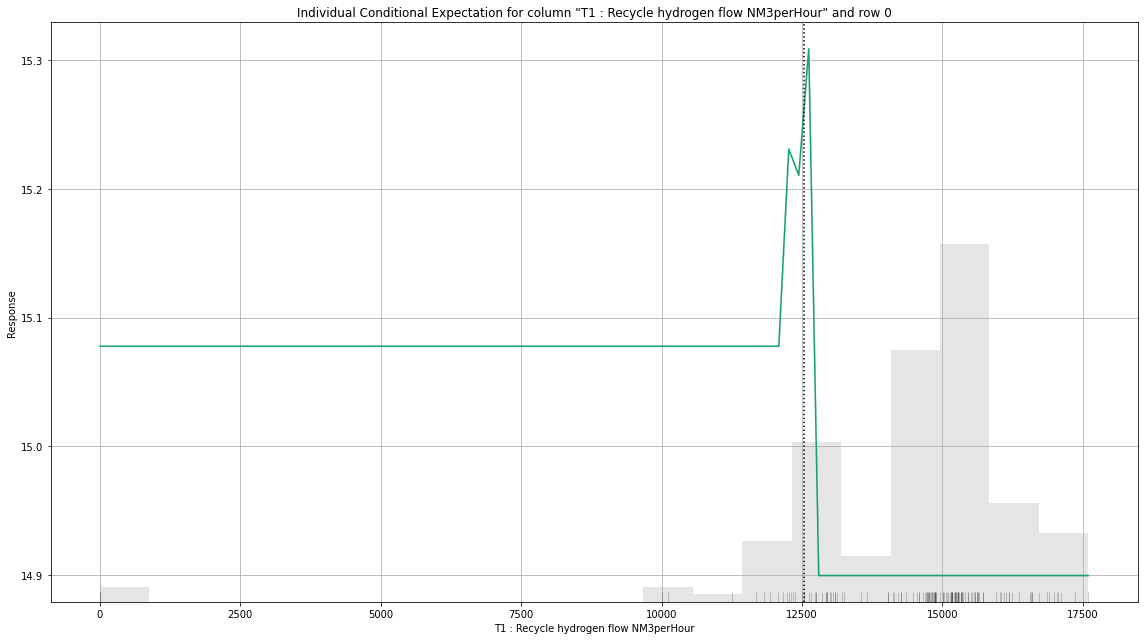

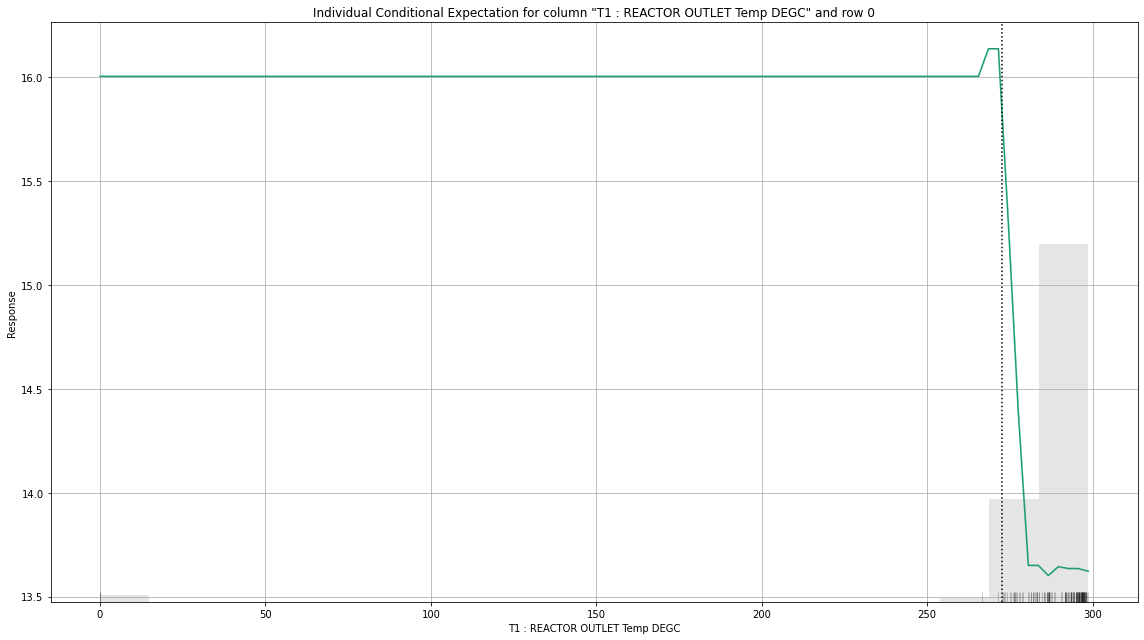

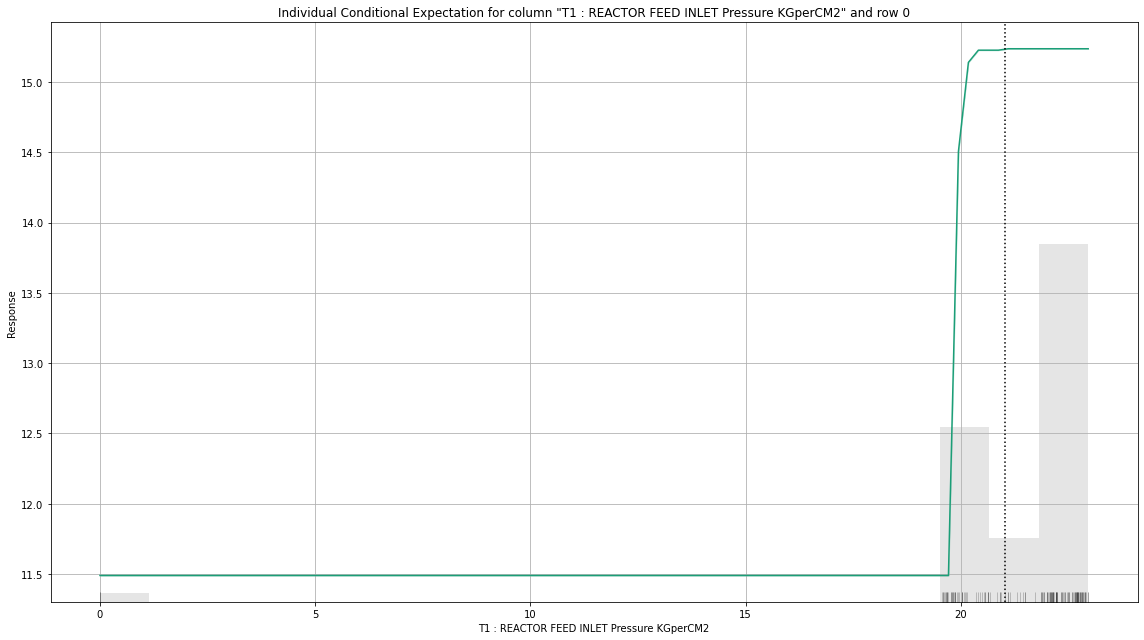

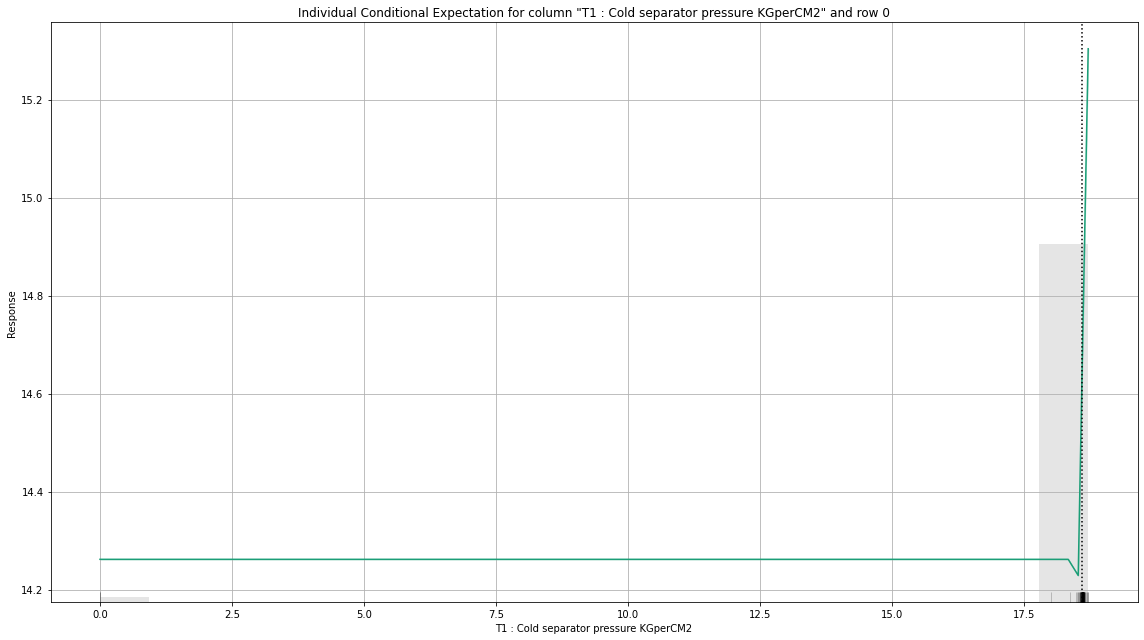

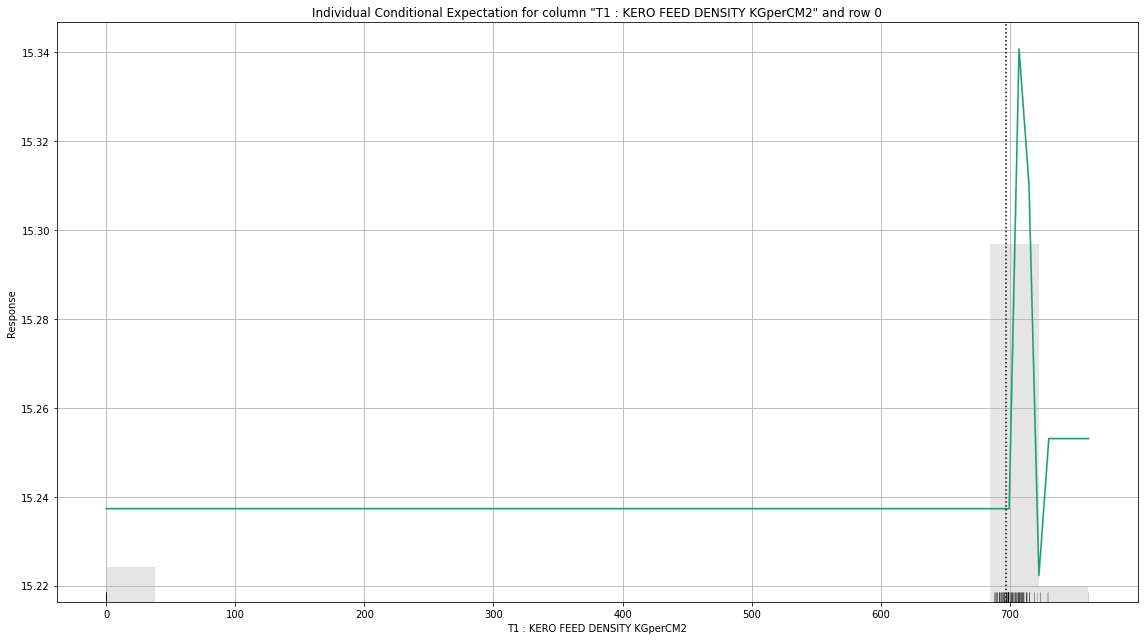

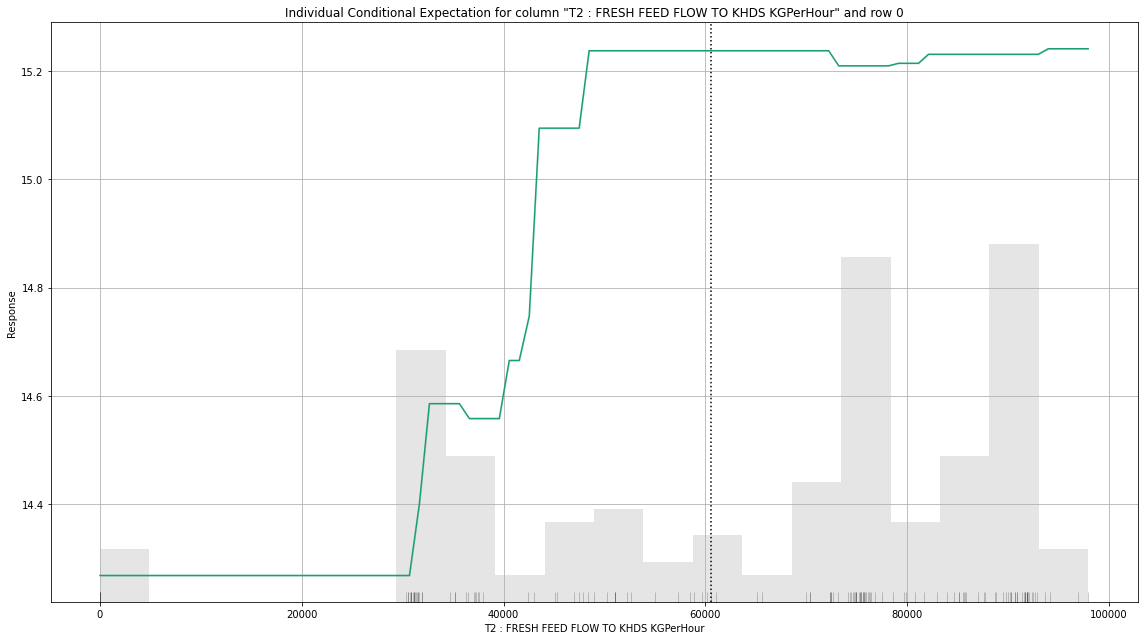

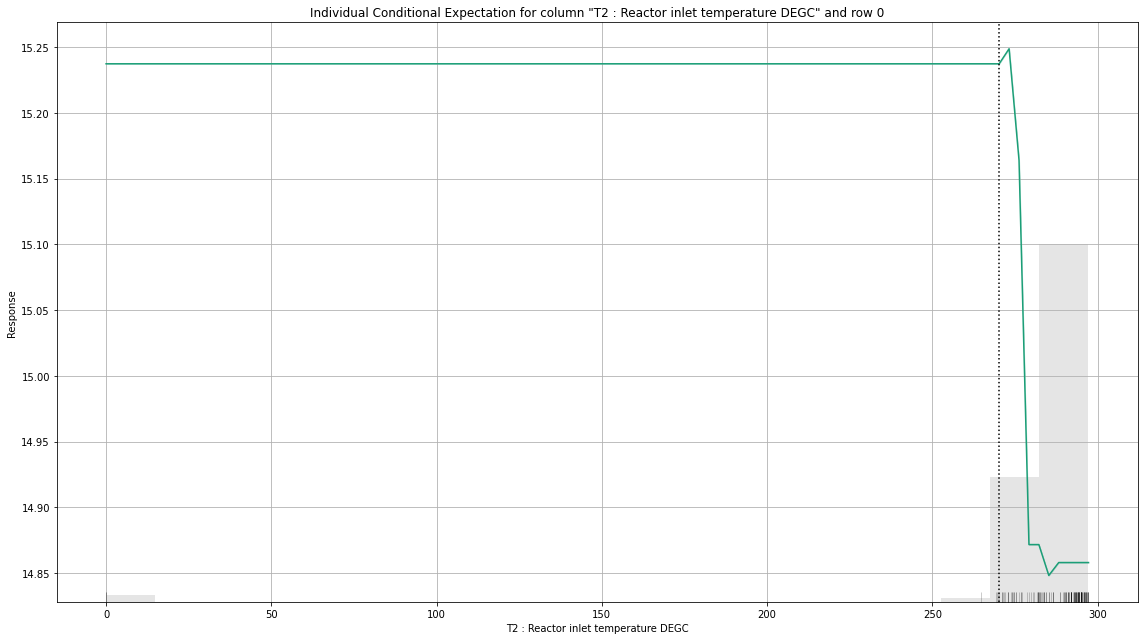

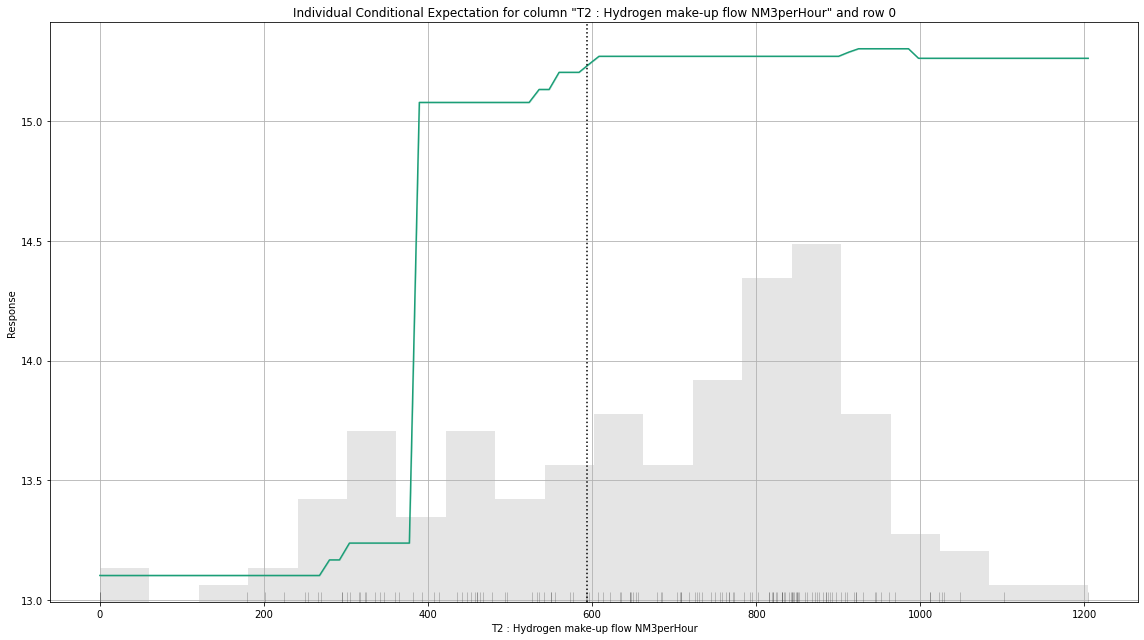

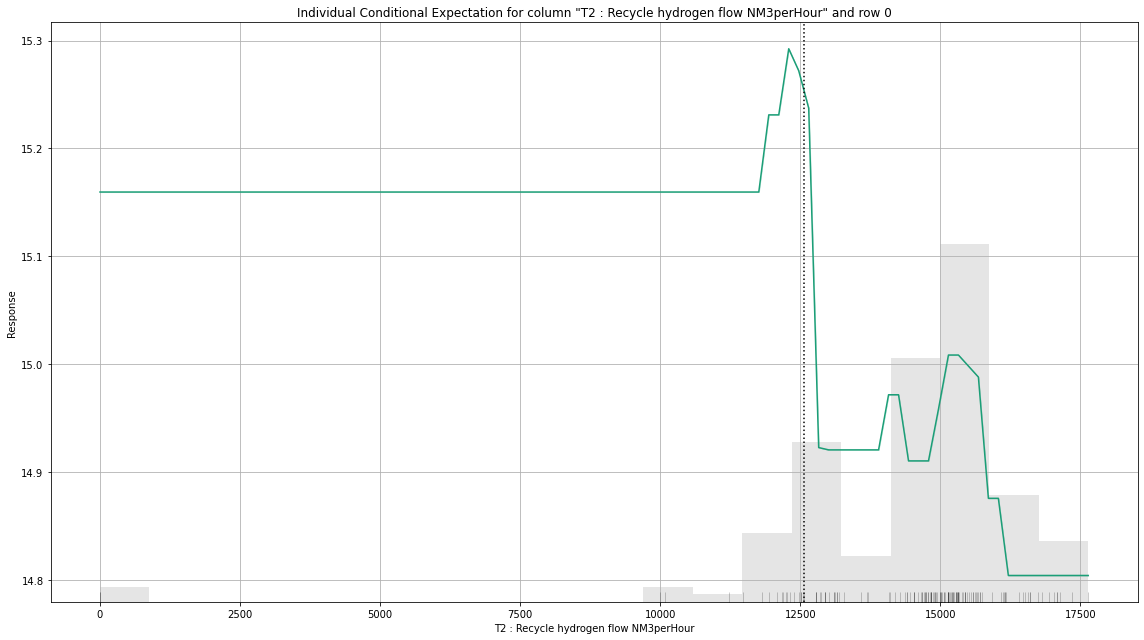

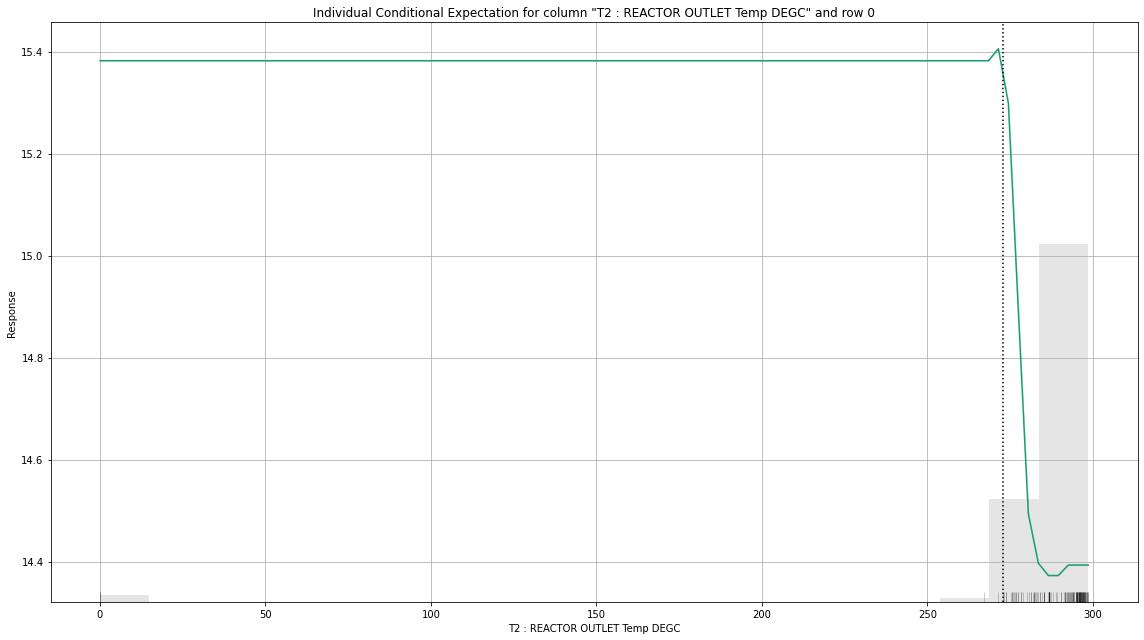

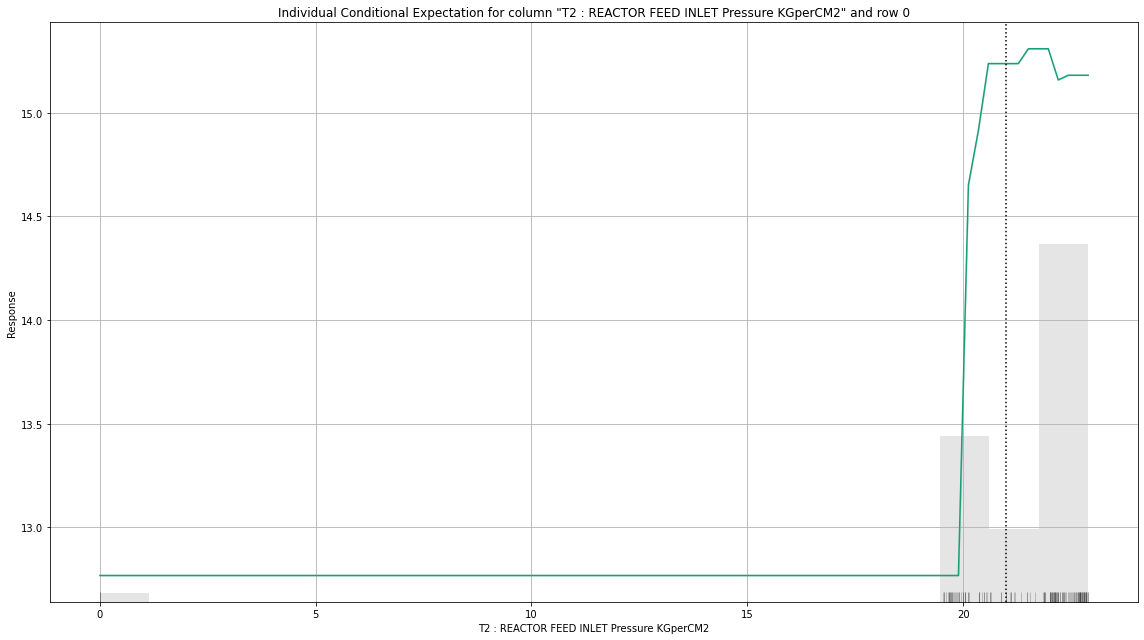

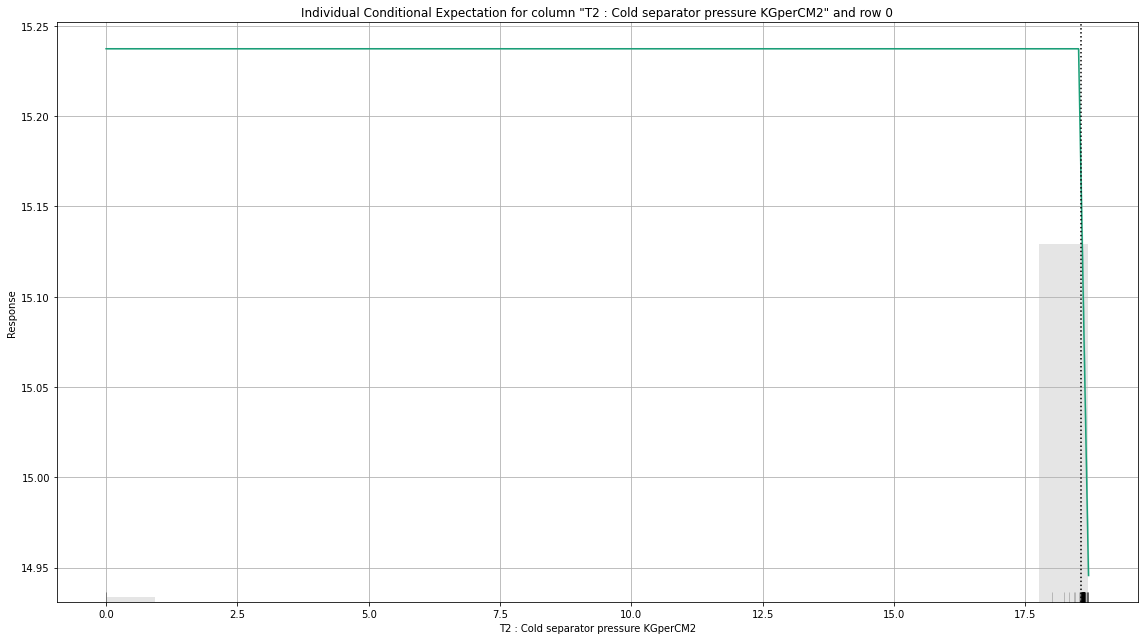

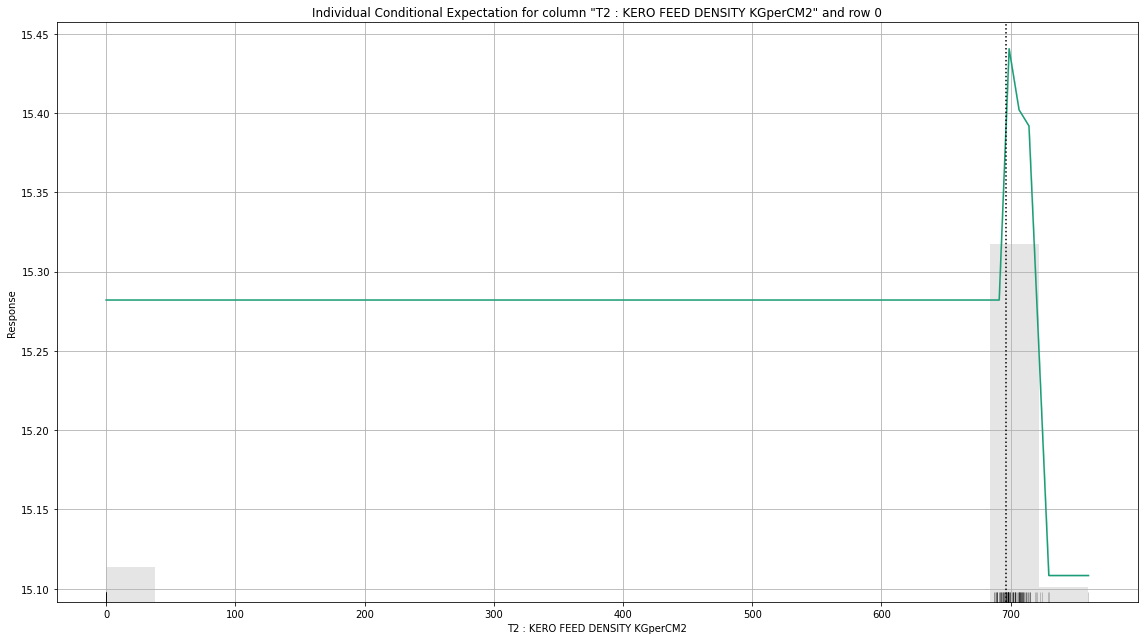

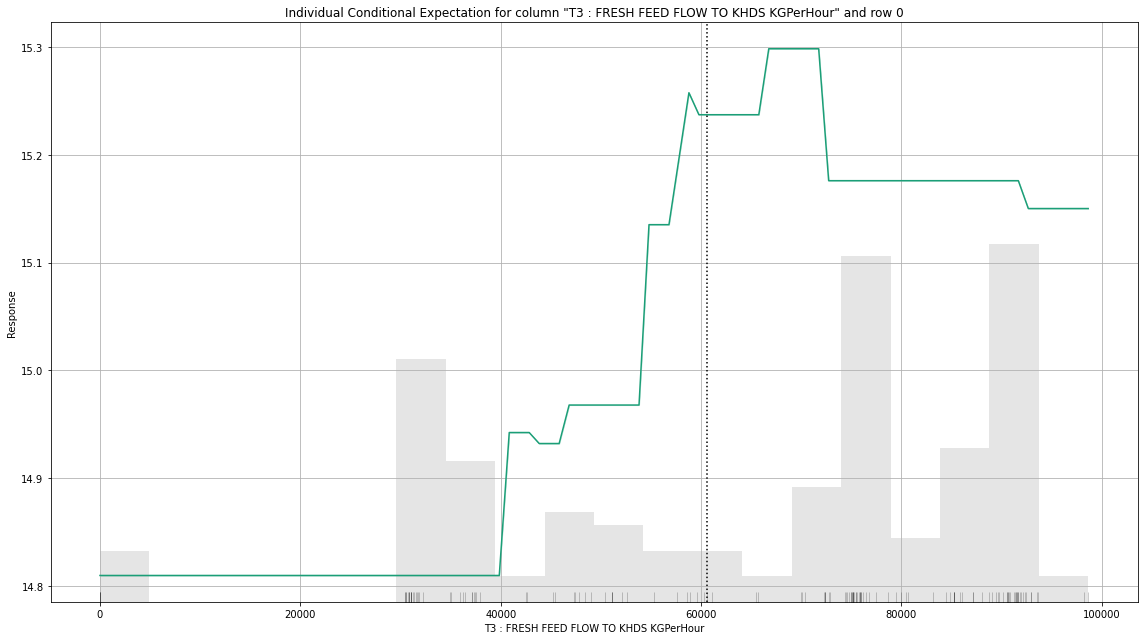

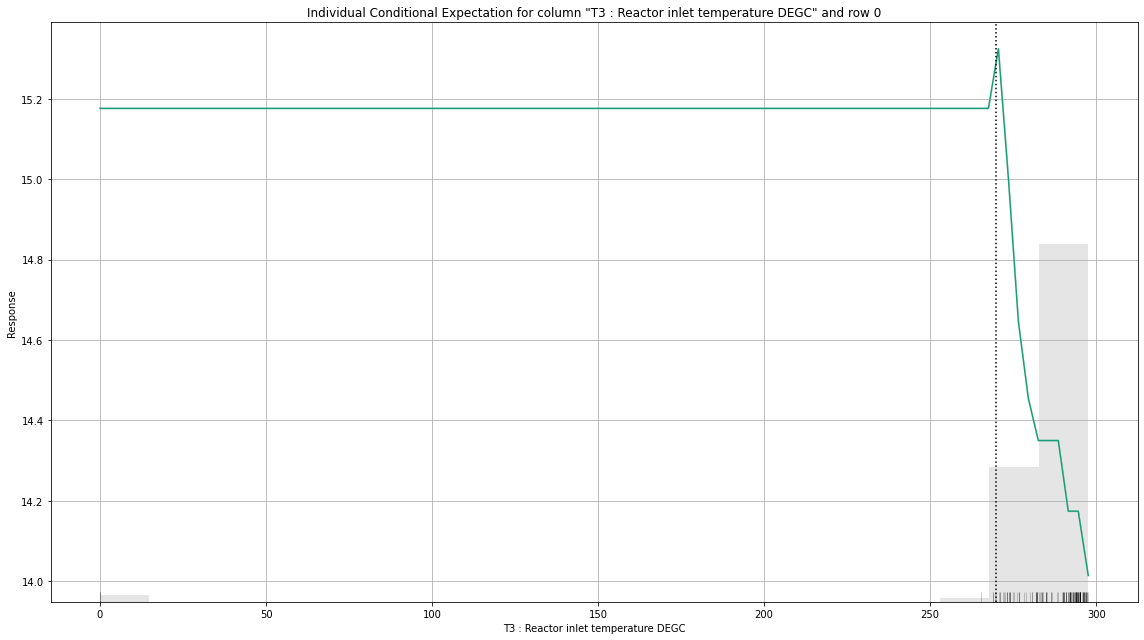

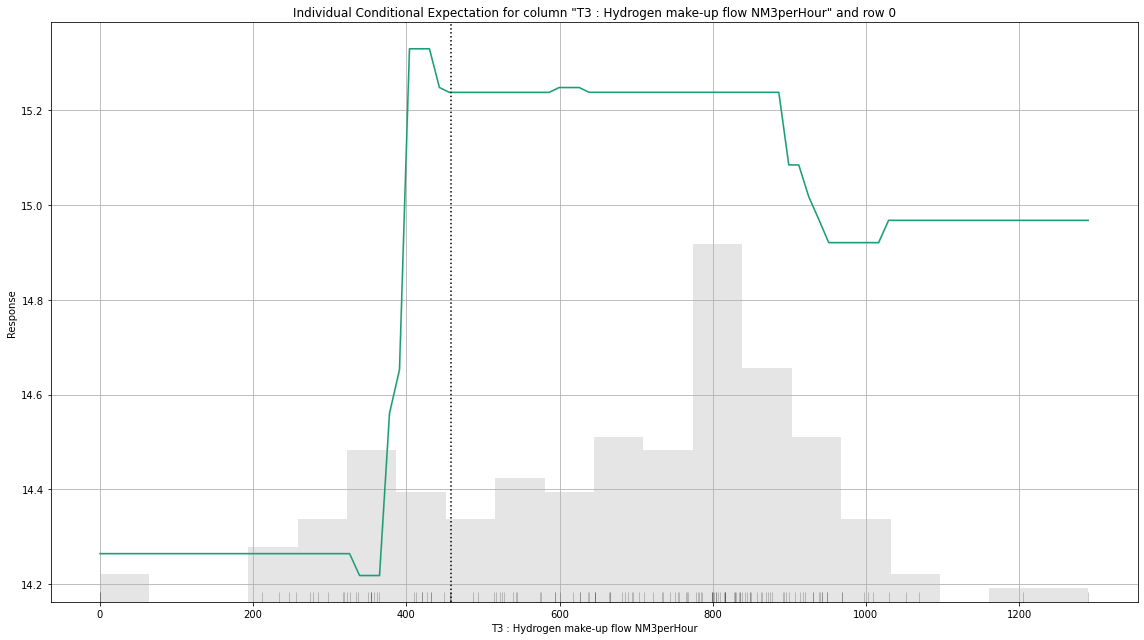

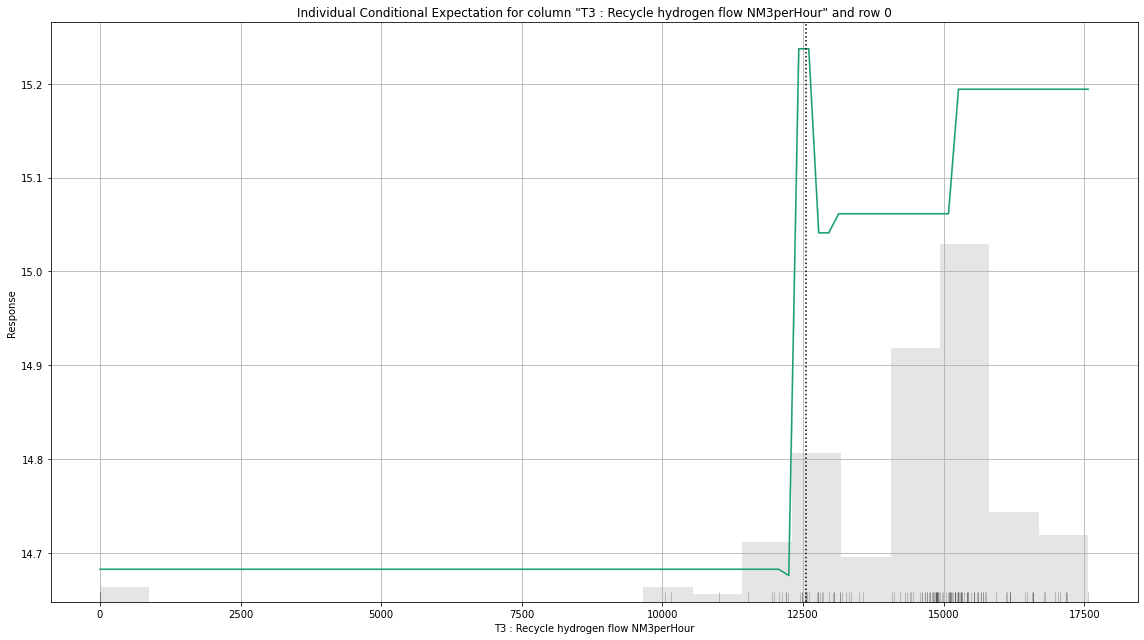

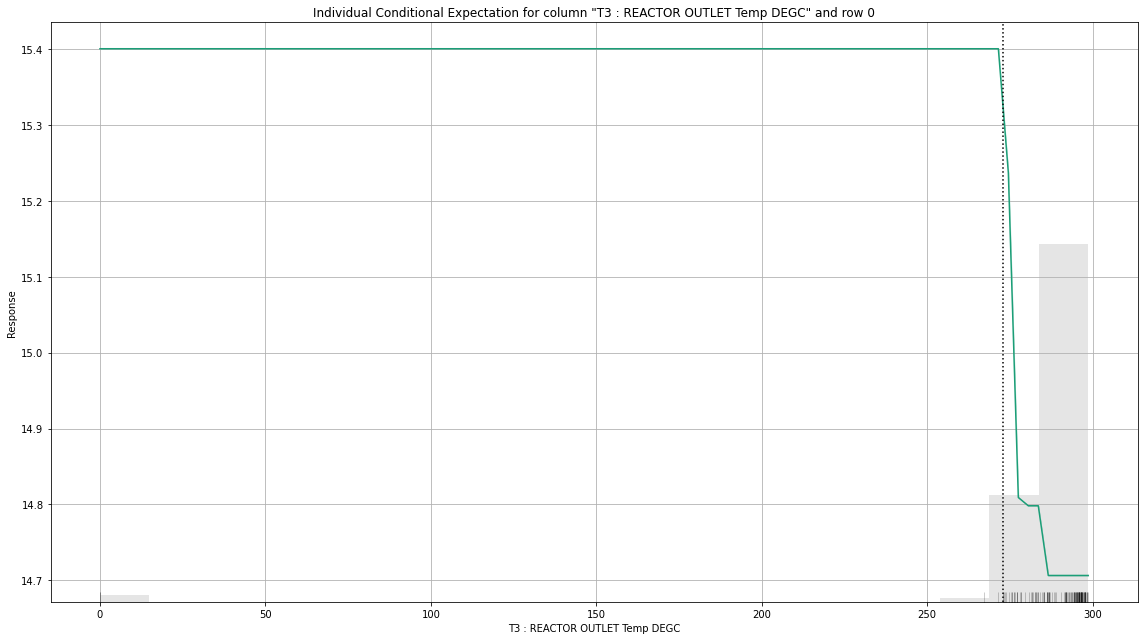

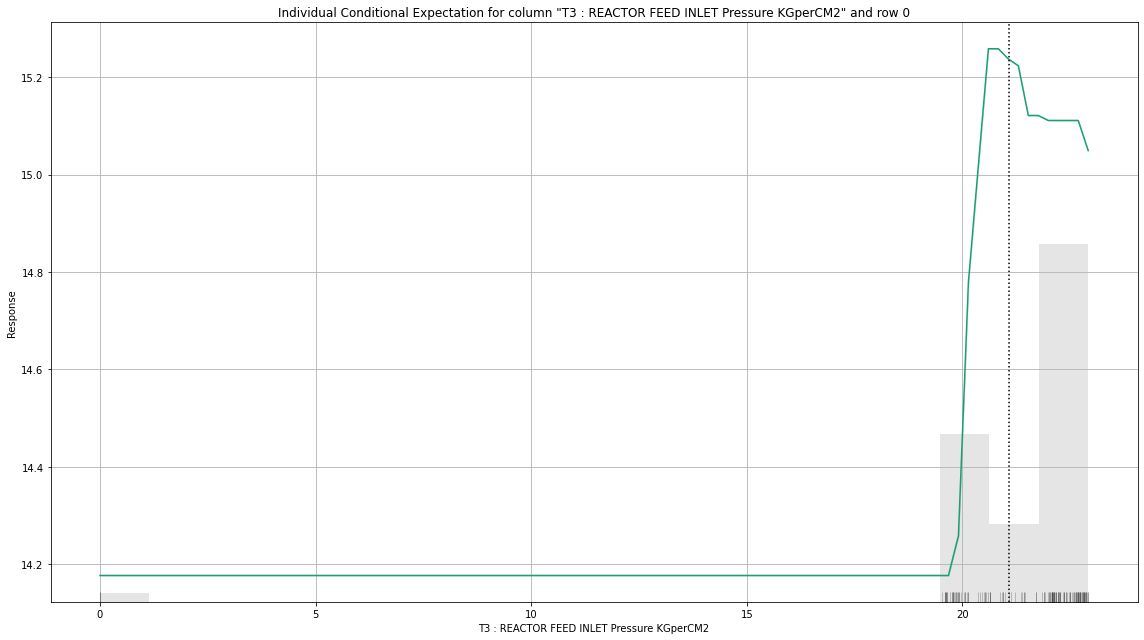

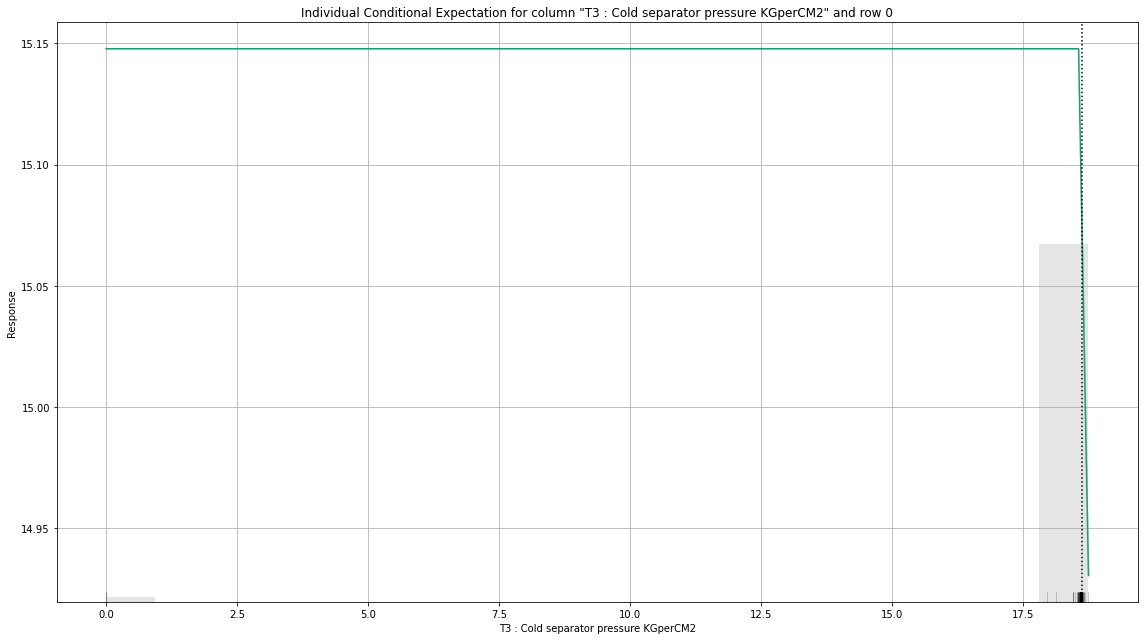

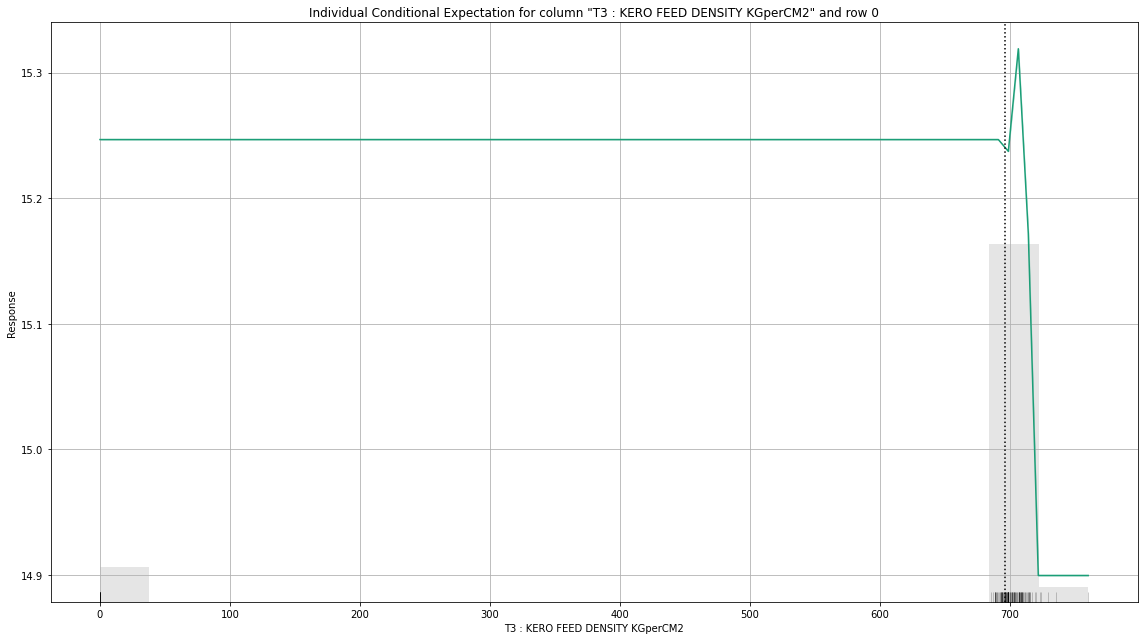

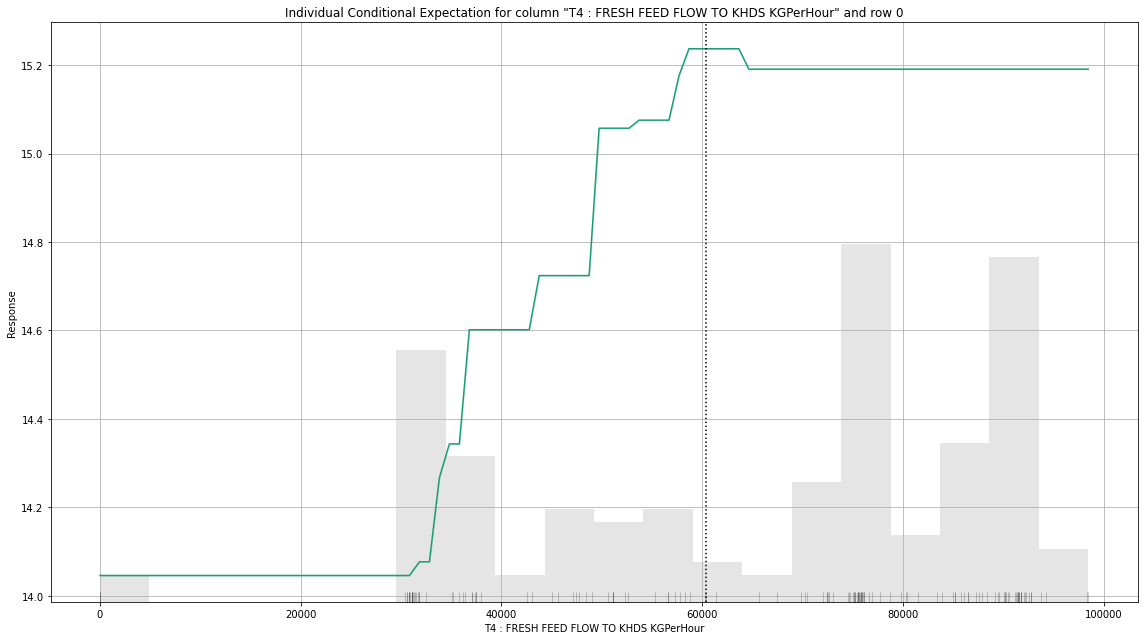

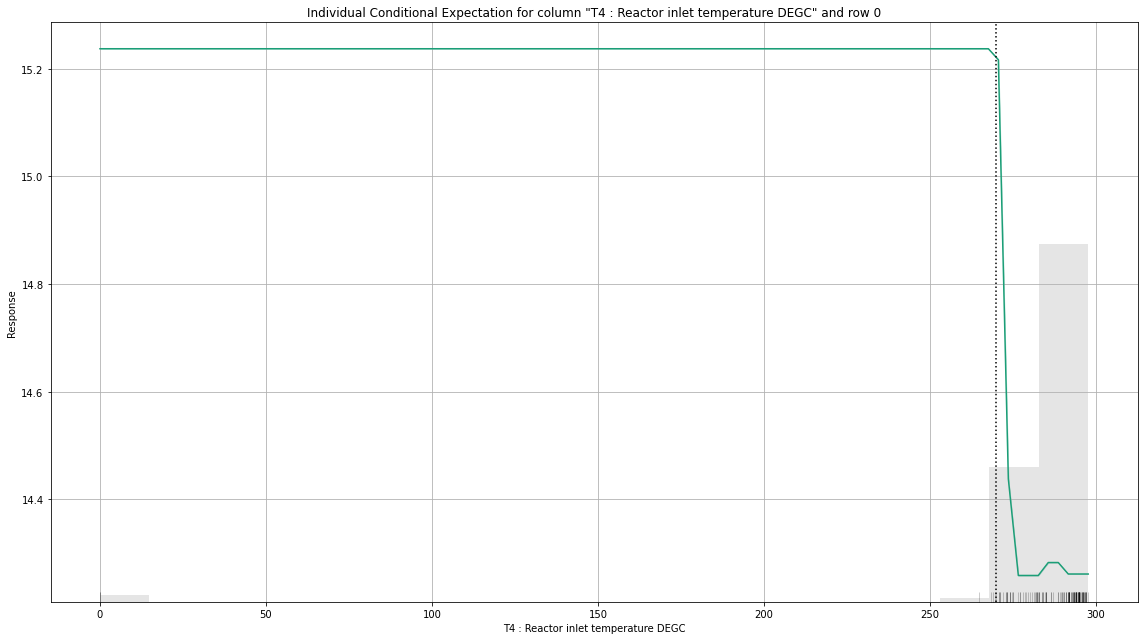

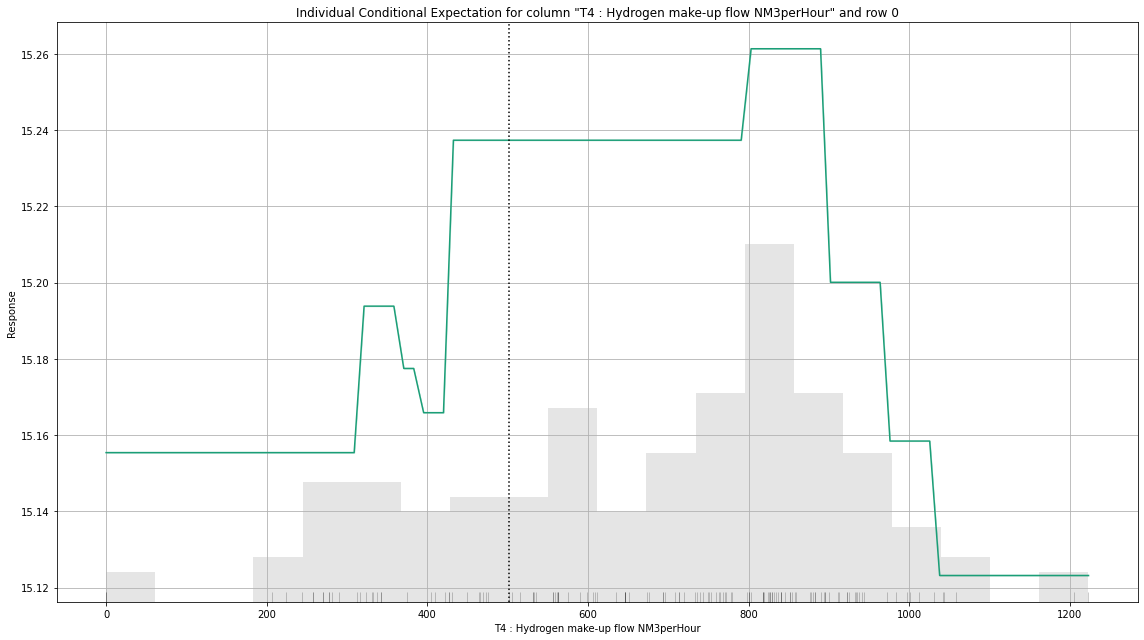

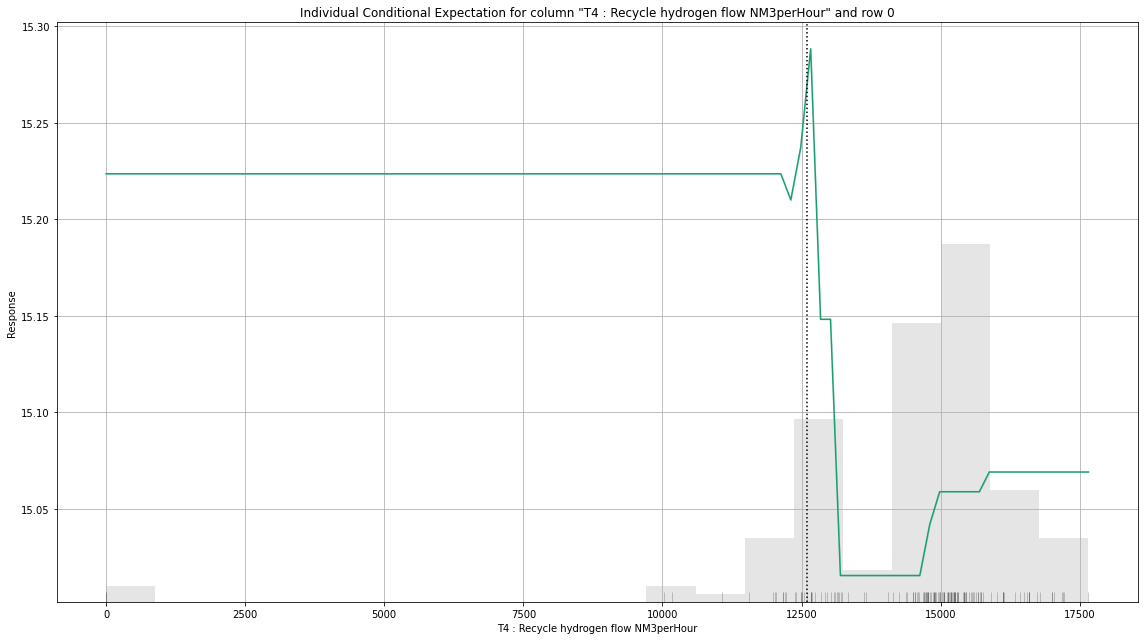

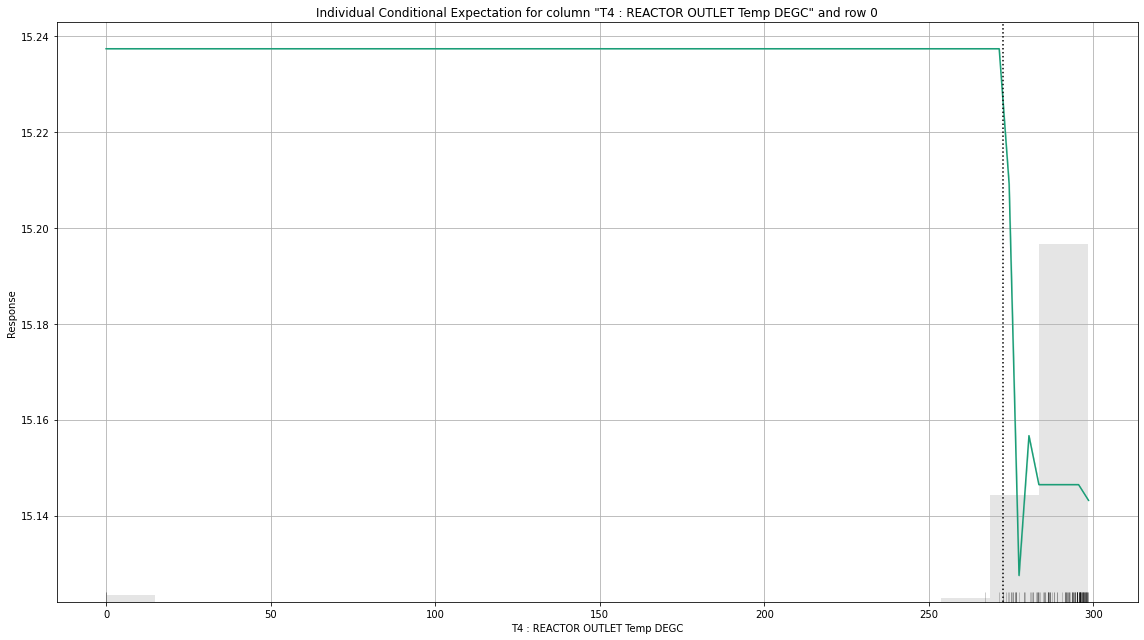

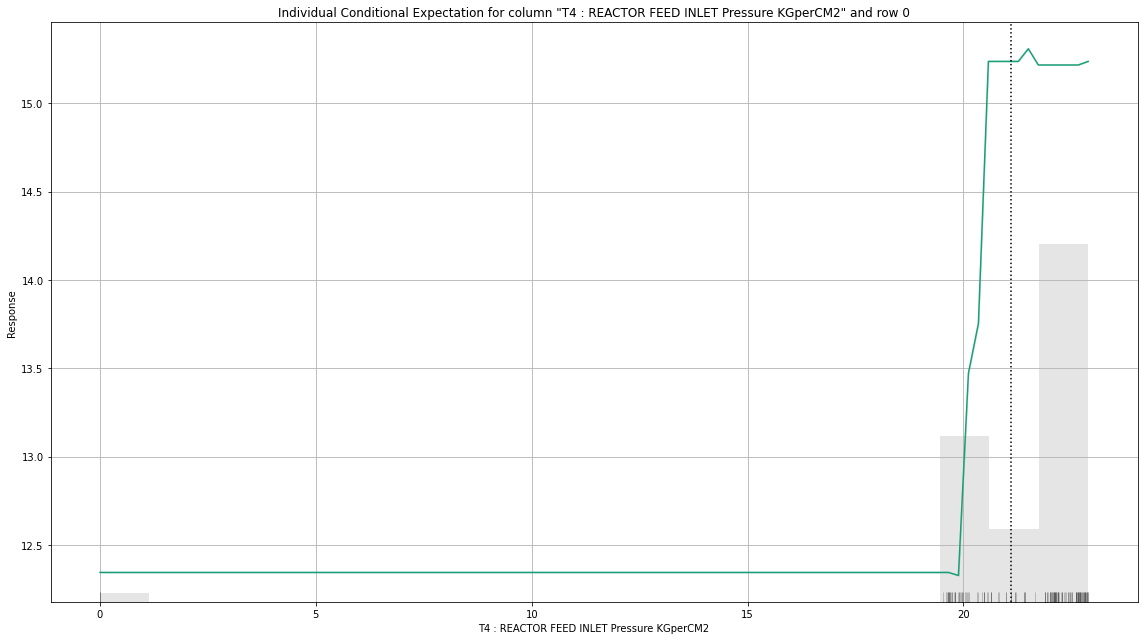

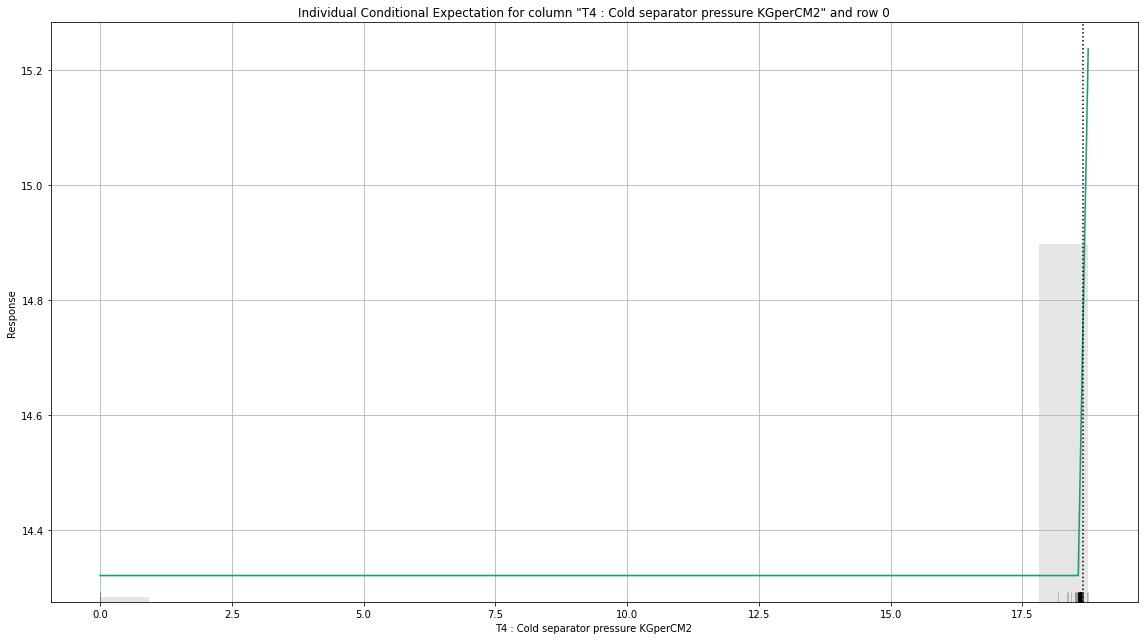

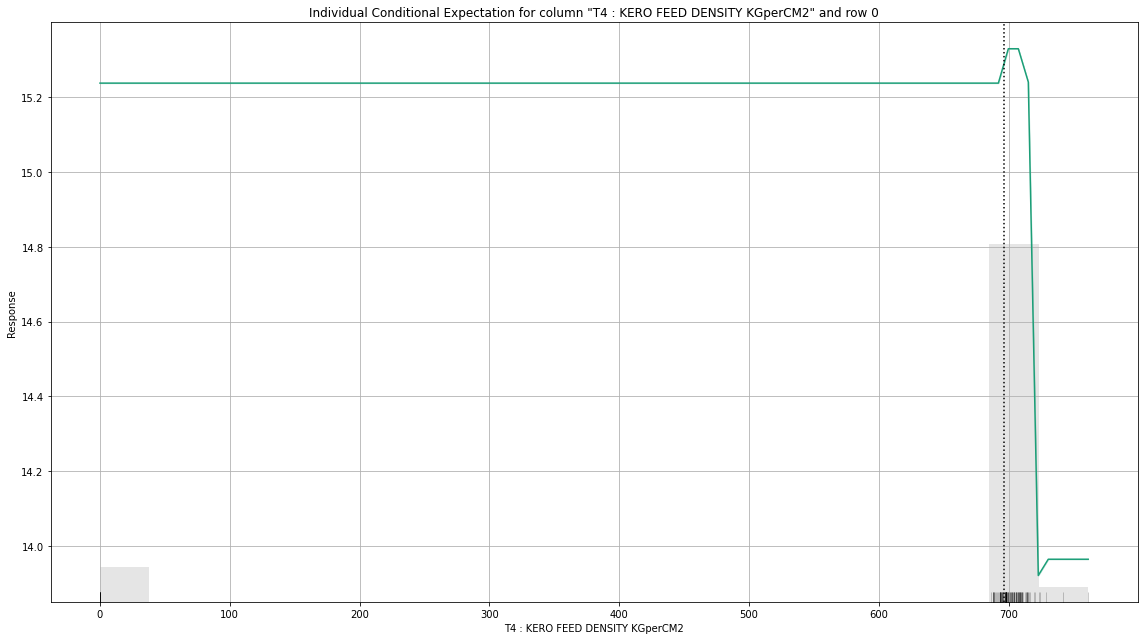

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [ ]:
# Explain first row with all AutoML models
aml.explain_row(test, row_index=0)

# Explain first row with a single H2O model (e.g. leader model from AutoML)
aml.leader.explain_row(test, row_index=0)

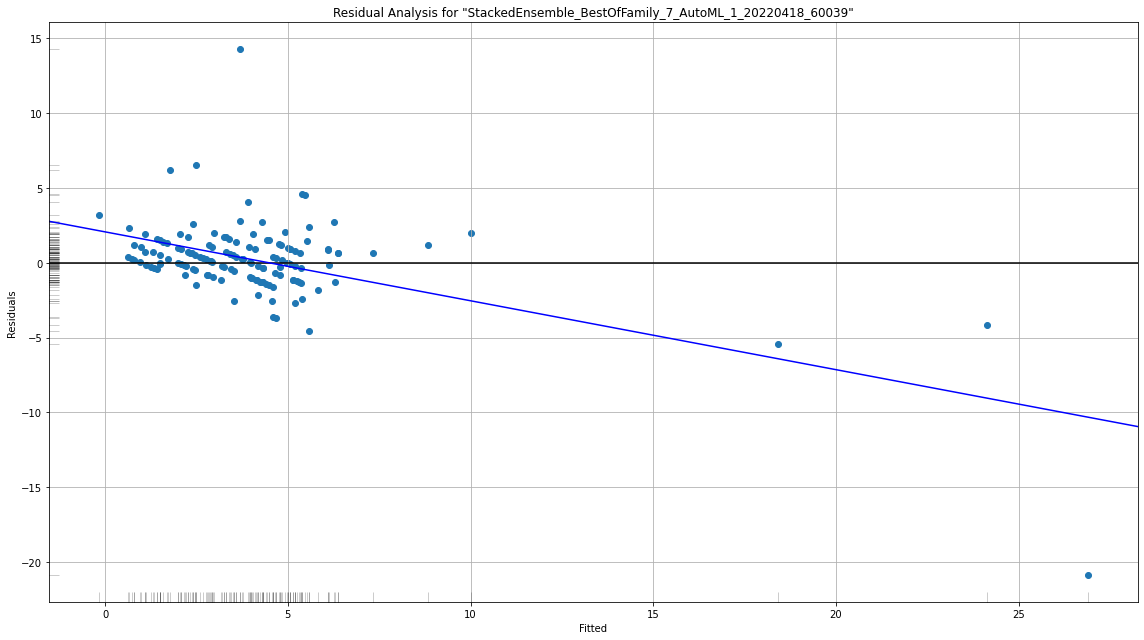

In [ ]:
ra_plot = out.residual_analysis_plot(test)

In [ ]:
#ra_plot = aml.varimp_plot()
out.varimp_plot()

H2OValueError: ignored

In [ ]:
# save the model
model_path_6 = aml.leader.download_mojo(path = "./")

In [ ]:
print (model_path_6)

/content/StackedEnsemble_BestOfFamily_4_AutoML_2_20220512_100254.zip


In [ ]:
imported_model = h2o.import_mojo(model_path_6)

generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1652341316230_71

No model summary for this model

ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.3863875627295977
RMSE: 0.6216008065709034
MAE: 0.4551848580030198
RMSLE: 0.14071384730178585
Mean Residual Deviance: 0.3863875627295977

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 1.8049559822583805
RMSE: 1.3434865024474123
MAE: 1.0255420681894594
RMSLE: 0.30590949932069356
Mean Residual Deviance: 1.8049559822583805

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.023520,0.044916,0.980065,1.085990,1.034454,0.979297,1.037794
1,mean_residual_deviance,1.792828,0.270767,1.492814,2.024226,2.053976,1.519119,1.874005
2,mse,1.792828,0.270767,1.492814,2.024226,2.053976,1.519119,1.874005
3,null_deviance,348.752000,49.519295,299.696170,349.202480,364.177150,307.837520,422.846770
4,r2,0.443839,0.067080,0.506108,0.356412,0.390156,0.498882,0.467640
5,residual_deviance,192.047320,39.392372,146.295730,224.689010,221.829390,151.911880,215.510560
6,rmse,1.335840,0.102225,1.221807,1.422753,1.433170,1.232525,1.368943
7,rmsle,0.305547,0.019673,0.291942,0.326021,0.314042,0.317274,0.278453


In [ ]:
uploaded1 = files.upload()

Saving KHDS_TestData_12Apr_rev_2.csv to KHDS_TestData_12Apr_rev_2 (1).csv


In [ ]:
for fn in uploaded1.keys():
  print('User uploaded1 file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded1[fn])))

User uploaded1 file "KHDS_TestData_12Apr_rev_2.csv" with length 16352 bytes


In [ ]:
new_observations = h2o.import_file(path='KHDS_TestData_12Apr_rev_2.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
predictions = imported_model.predict(new_observations)

generic prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
predictions.head(52)

predict
5.11777
6.20085
5.28983
4.01781
6.10214
5.48946
6.09673
6.10341
2.97288
3.85322


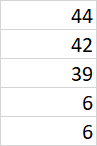

In [ ]:
predictions.describe

predict
5.11777
6.20085
5.28983
4.01781
6.10214
5.48946
6.09673
6.10341
2.97288
3.85322


<bound method H2OFrame.describe of >

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_BestOfFamily_4_AutoML_2_20220512_100254,1.34349,1.80496,1.02554,0.305909,1.80496,132,0.069517,StackedEnsemble,5.32439
StackedEnsemble_BestOfFamily_6_AutoML_2_20220512_100254,1.34651,1.8131,1.03226,0.3069,1.8131,531,0.066718,StackedEnsemble,5.26846
StackedEnsemble_AllModels_4_AutoML_2_20220512_100254,1.34705,1.81454,1.04446,0.310212,1.81454,293,0.125663,StackedEnsemble,5.19672
XRT_1_AutoML_2_20220512_100254,1.34975,1.82183,1.05405,0.311757,1.82183,669,0.009579,DRF,5.56296
StackedEnsemble_BestOfFamily_3_AutoML_2_20220512_100254,1.34982,1.82202,1.03455,0.309503,1.82202,124,0.036509,StackedEnsemble,5.79305
StackedEnsemble_BestOfFamily_7_AutoML_2_20220512_100254,1.35117,1.82567,1.0355,0.308842,1.82567,122,0.037148,StackedEnsemble,5.37359
StackedEnsemble_AllModels_6_AutoML_2_20220512_100254,1.35439,1.83436,1.03908,0.311533,1.83436,1396,0.118394,StackedEnsemble,5.37058
StackedEnsemble_Best1000_1_AutoML_2_20220512_100254,1.35743,1.84263,1.04881,0.311851,1.84263,326,0.160847,StackedEnsemble,5.08653
StackedEnsemble_AllModels_2_AutoML_2_20220512_100254,1.35836,1.84513,1.04566,0.31037,1.84513,137,0.037907,StackedEnsemble,5.78893
StackedEnsemble_BestOfFamily_2_AutoML_2_20220512_100254,1.3588,1.84634,1.03745,0.309623,1.84634,133,0.02593,StackedEnsemble,5.8577


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

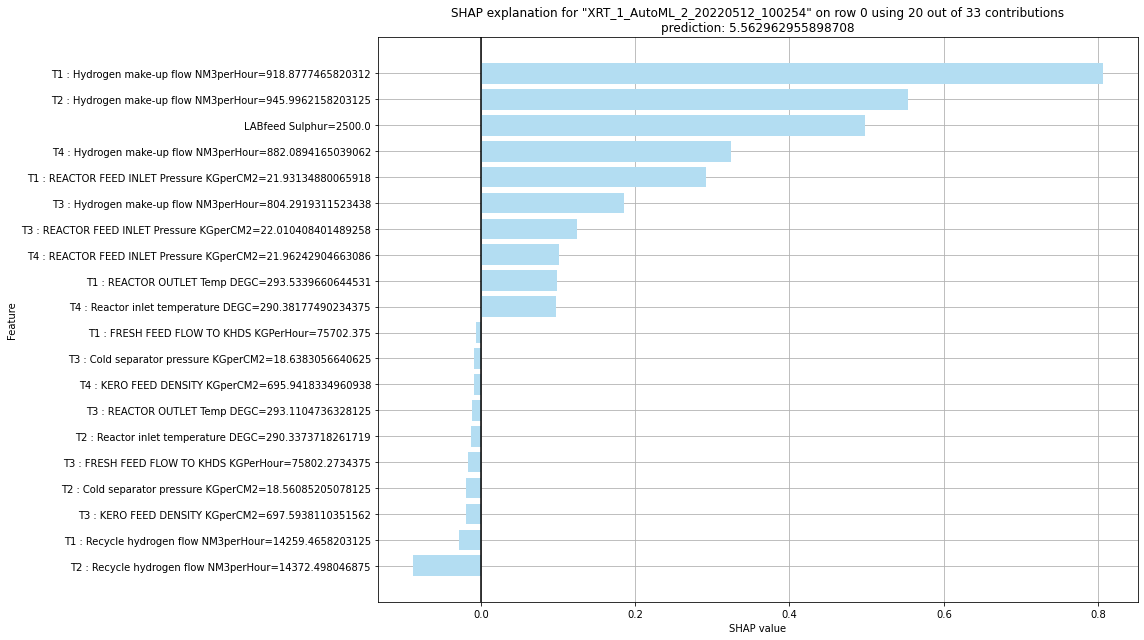

/usr/local/lib/python3.7/dist-packages/h2o/explanation/_explain.py:3175: UserWarning: No model with variable importance. Selecting all features to explain.
  warnings.warn("No model with variable importance. Selecting all features to explain.")


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

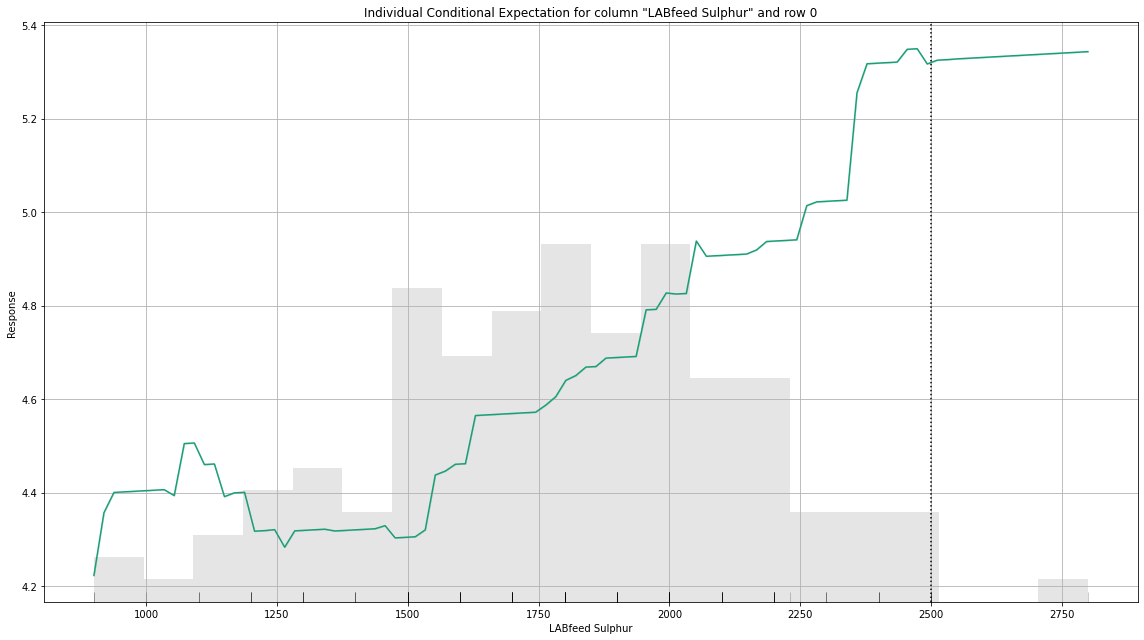

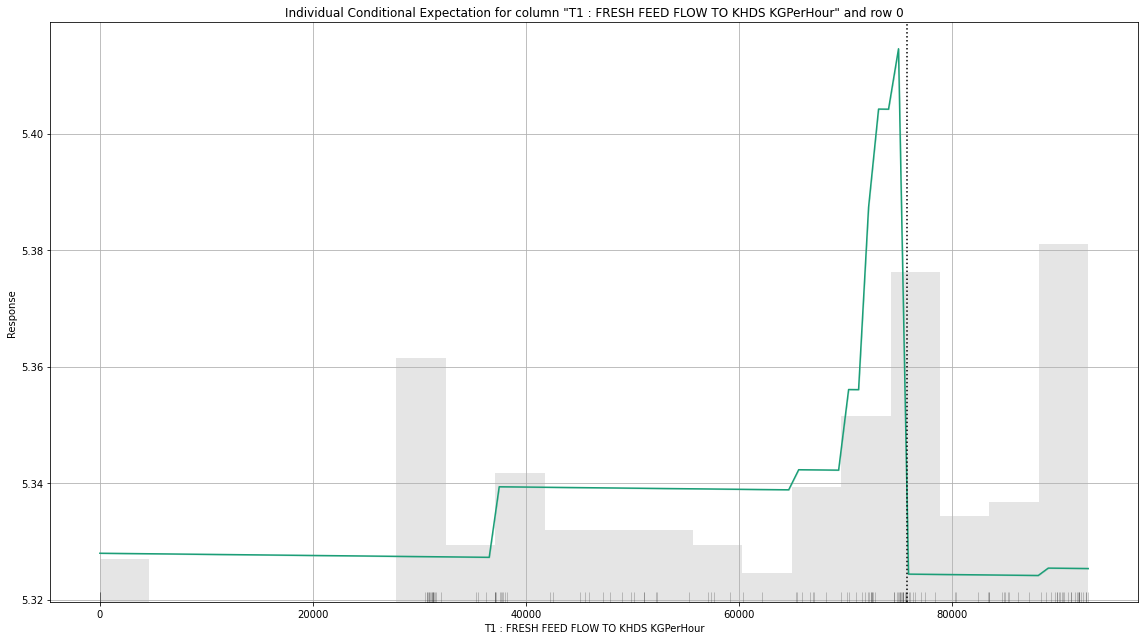

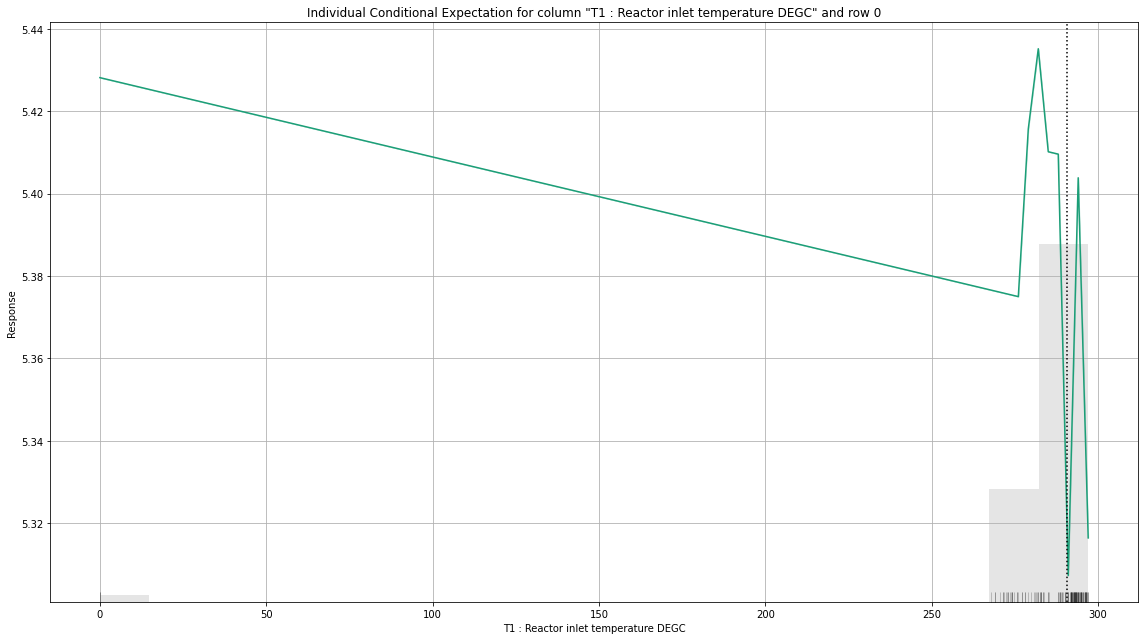

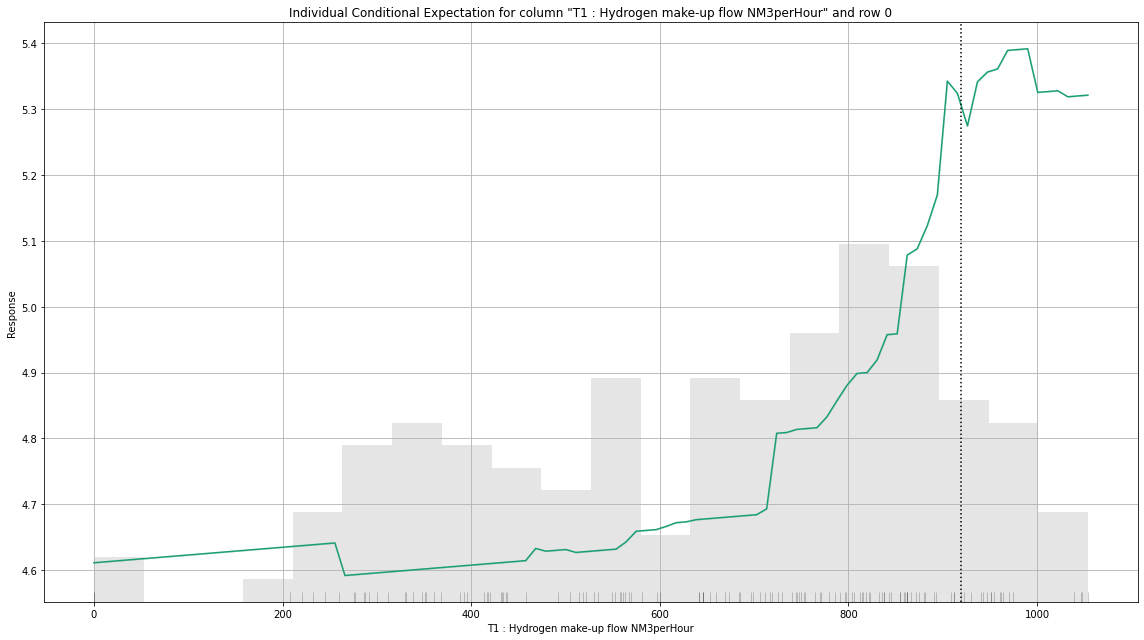

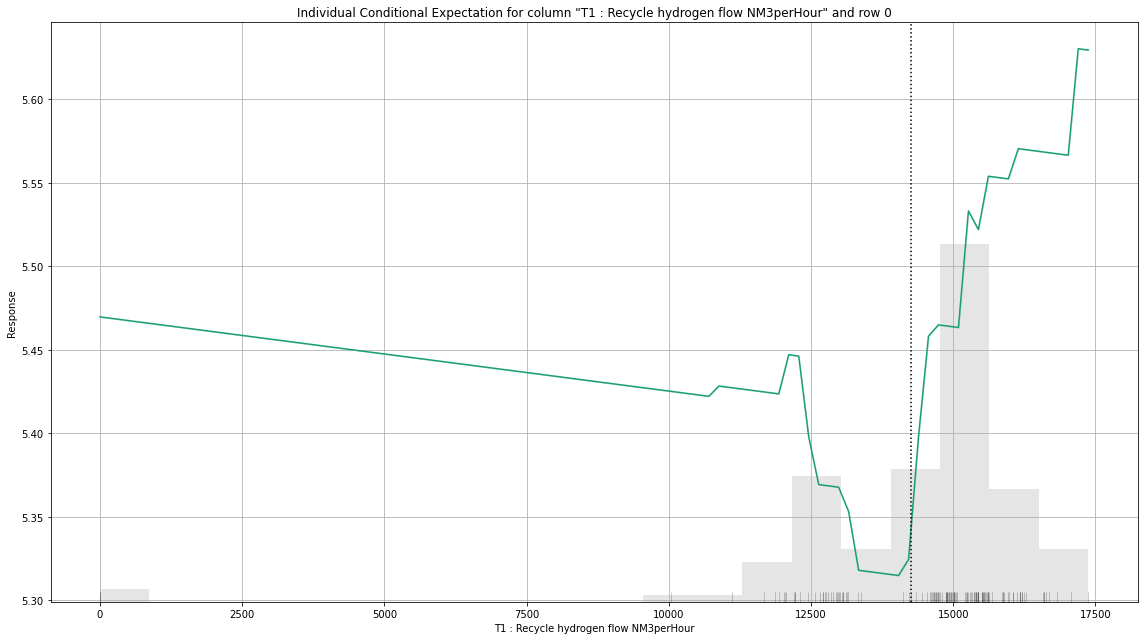

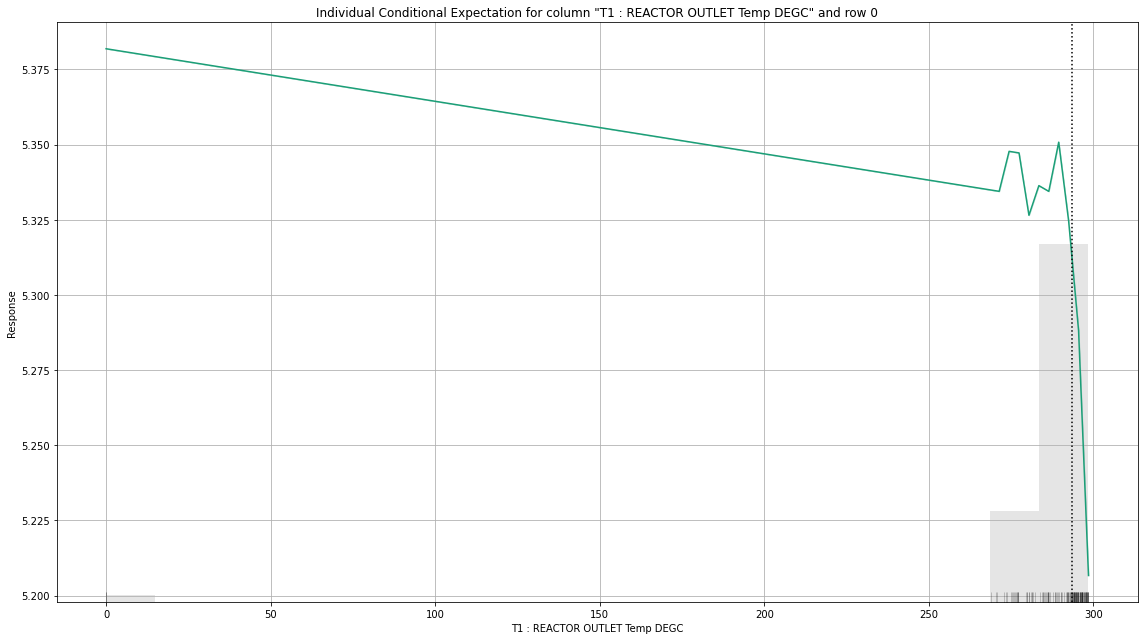

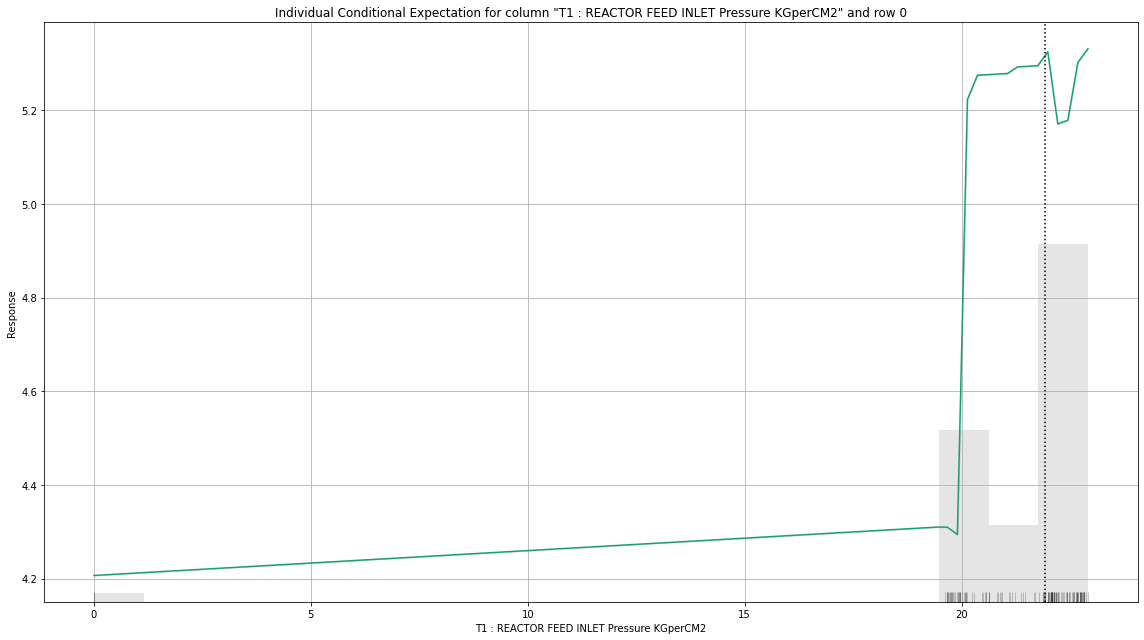

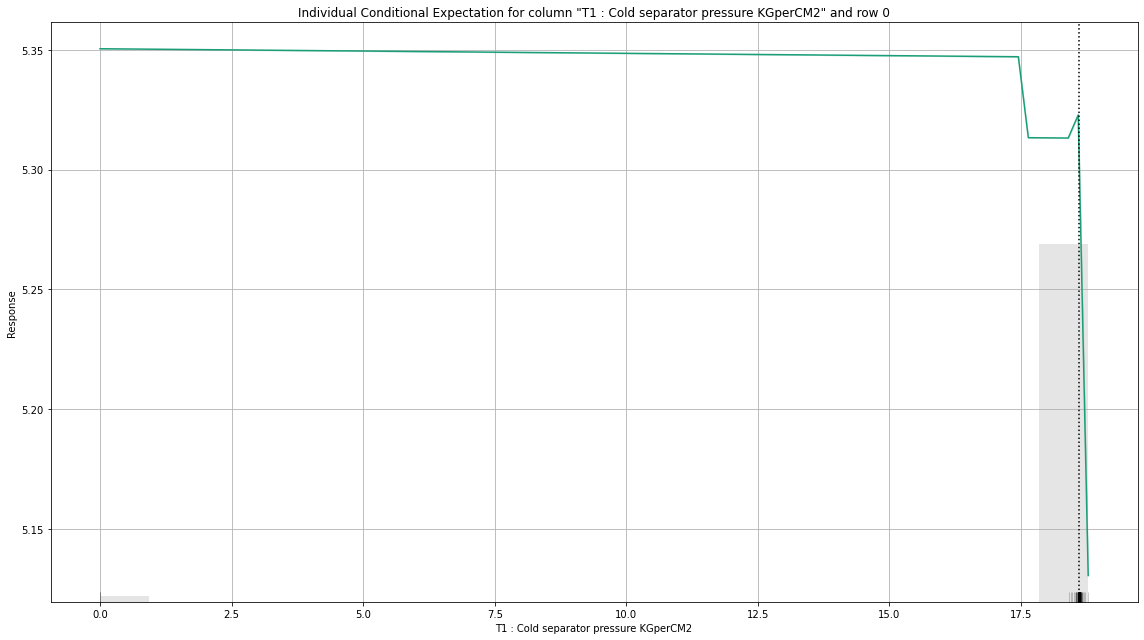

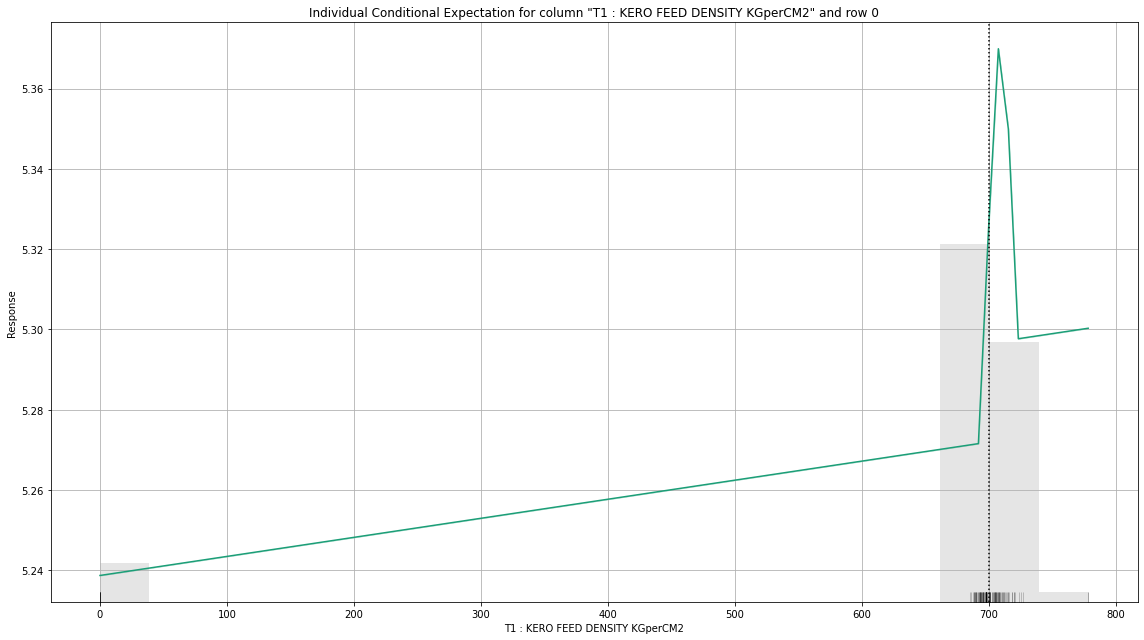

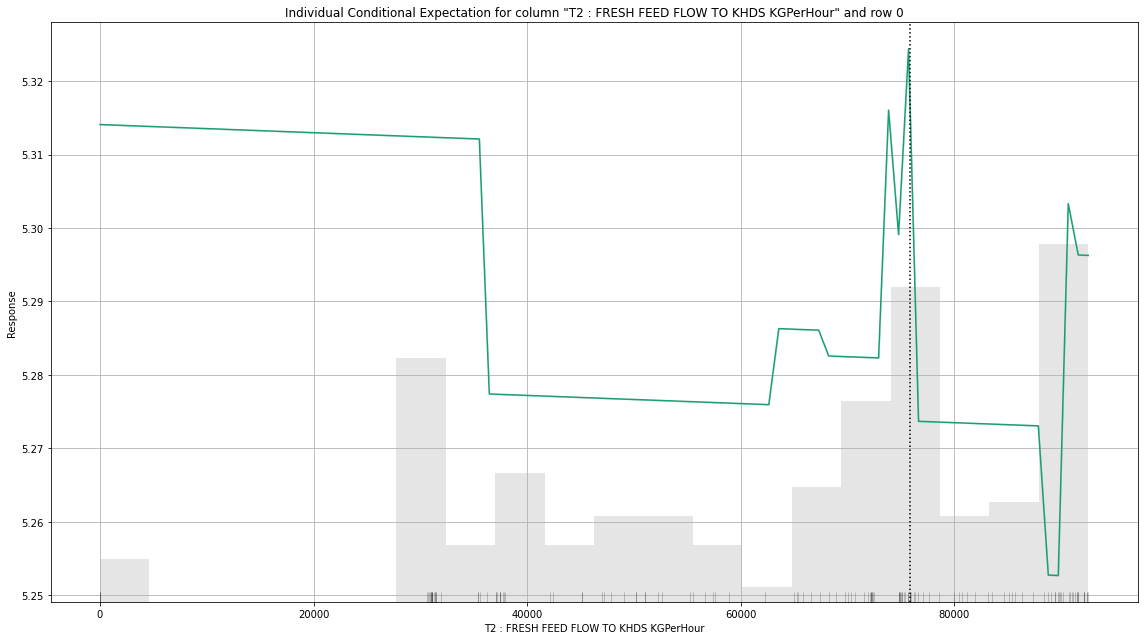

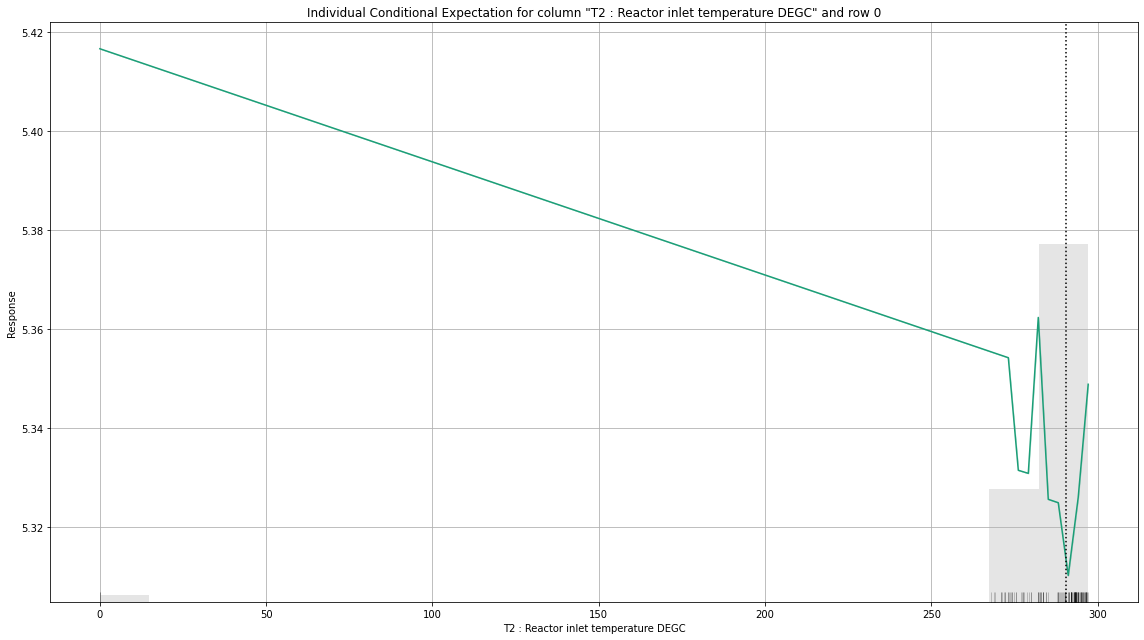

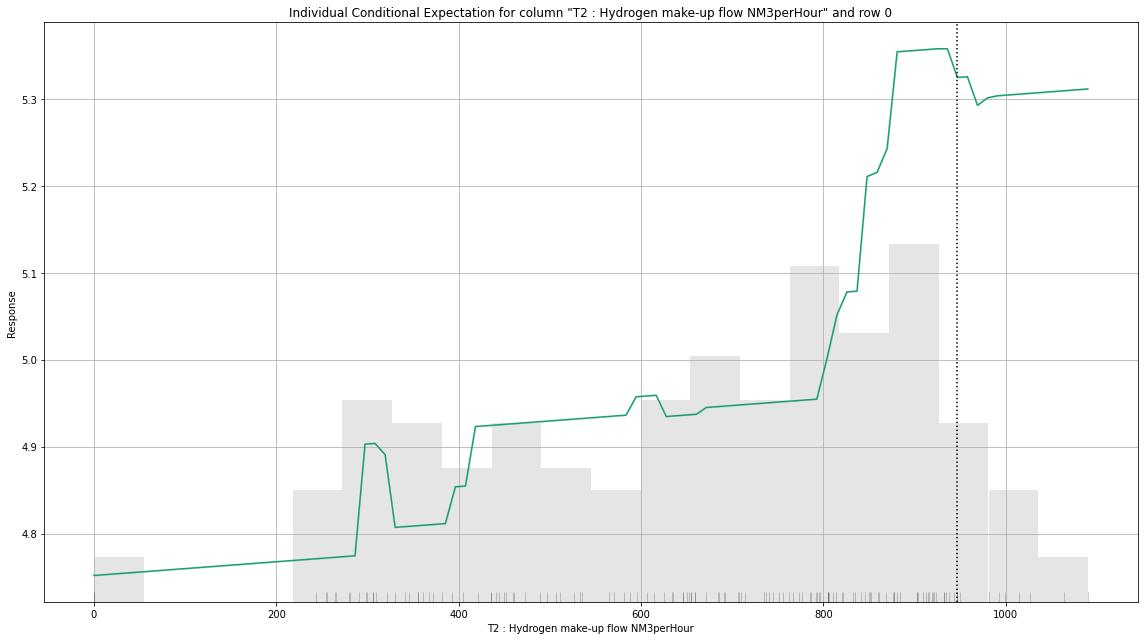

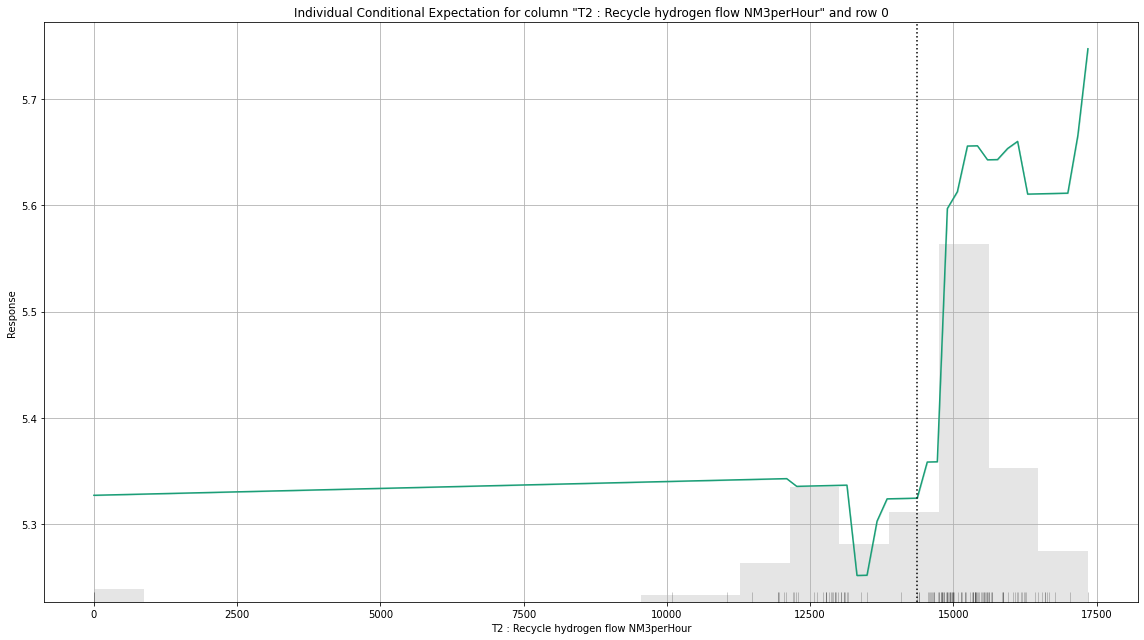

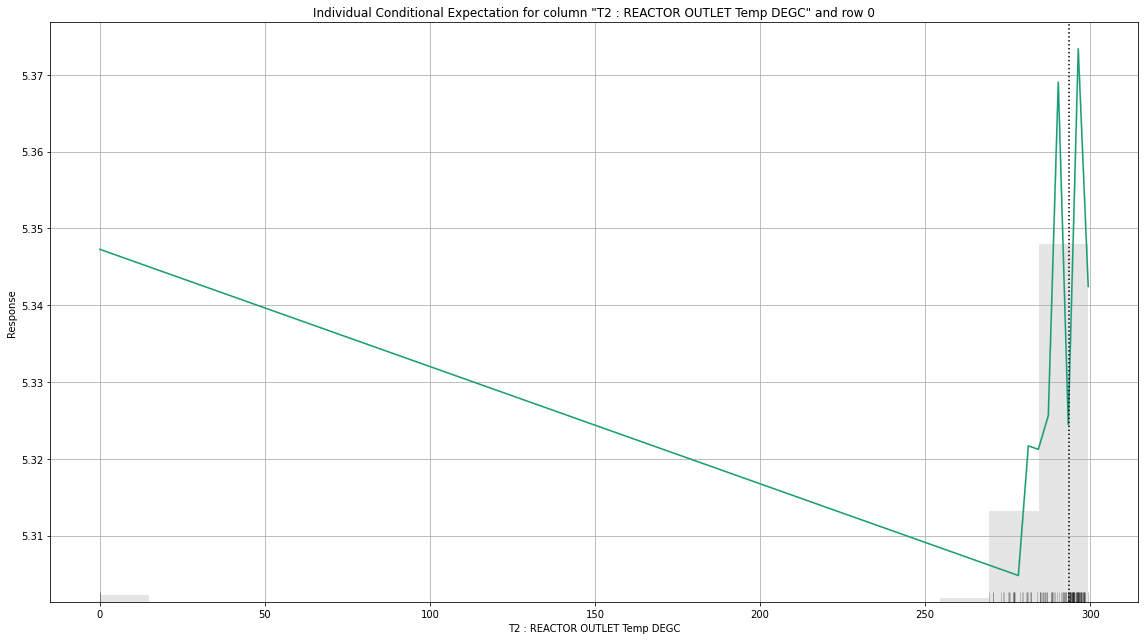

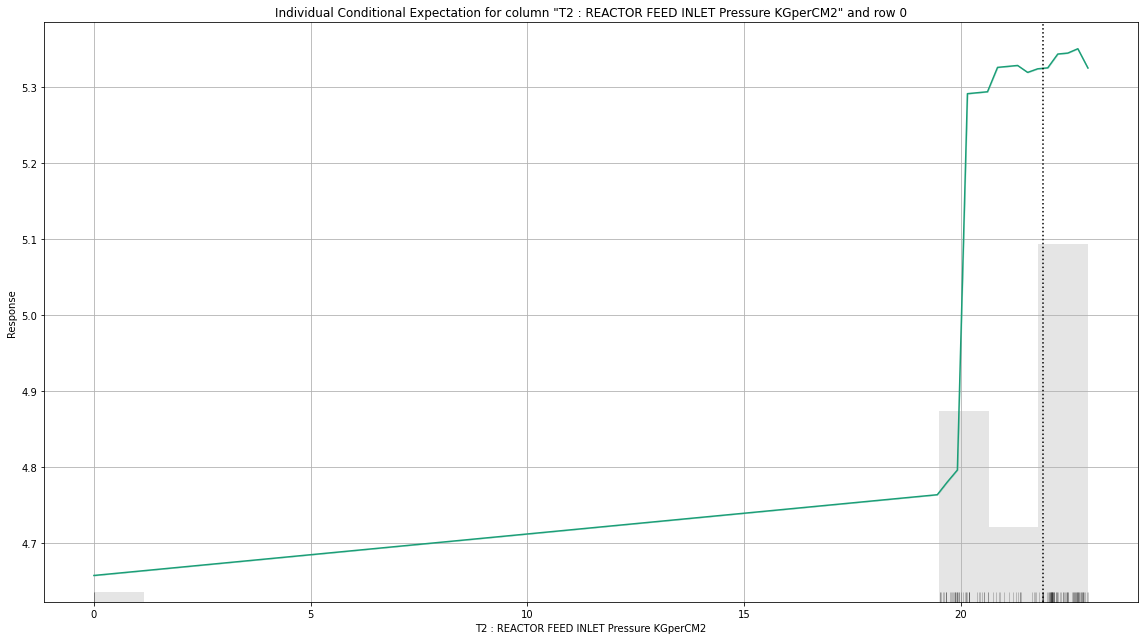

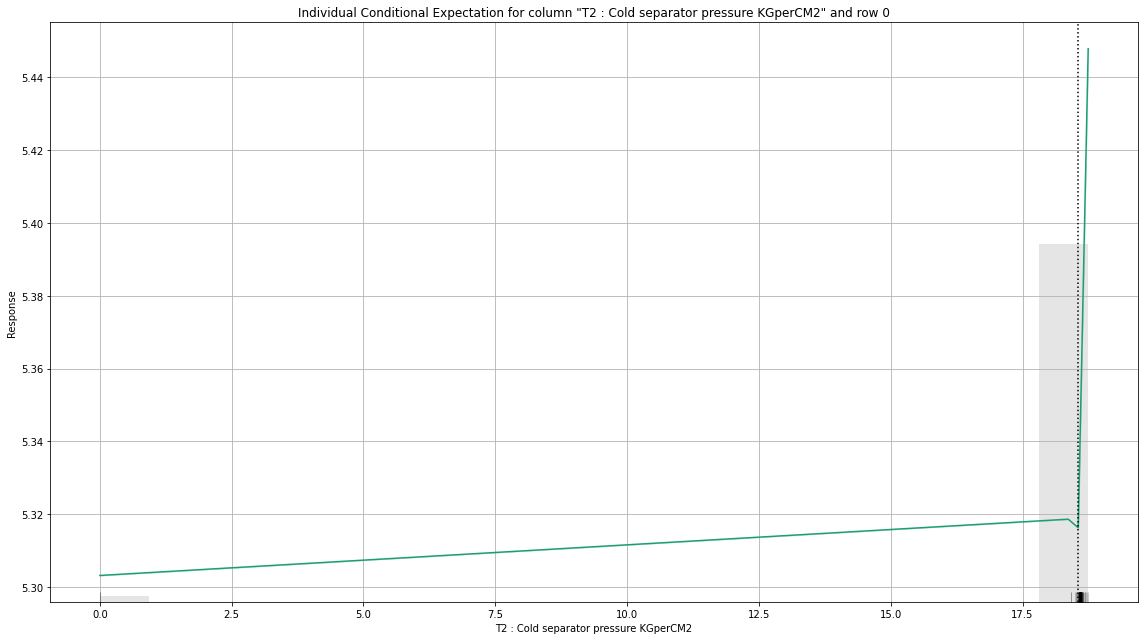

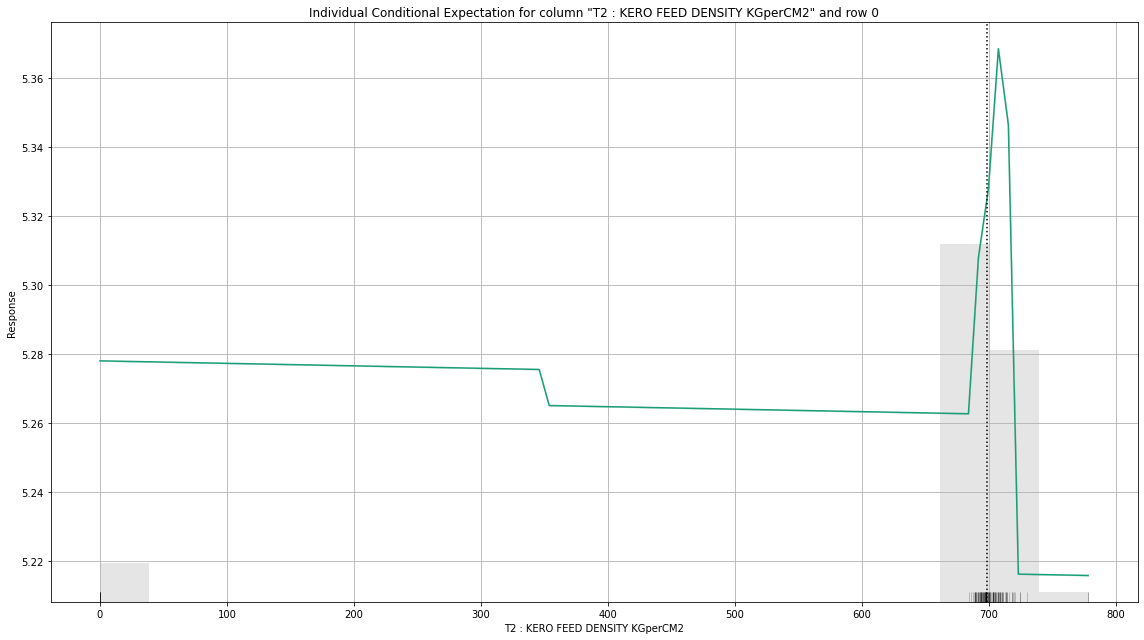

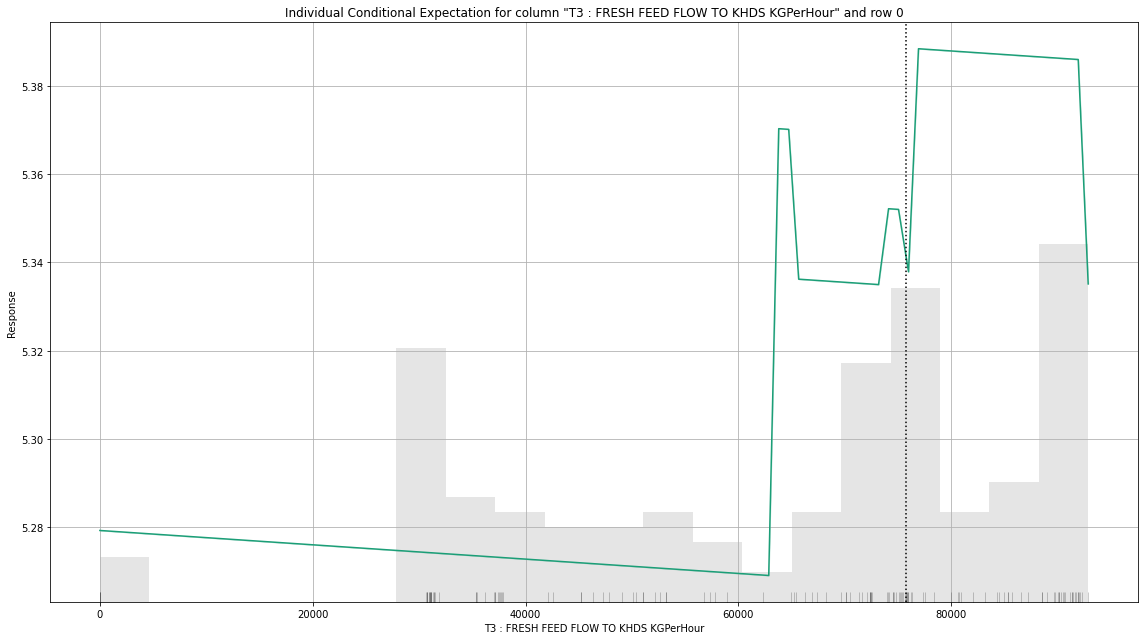

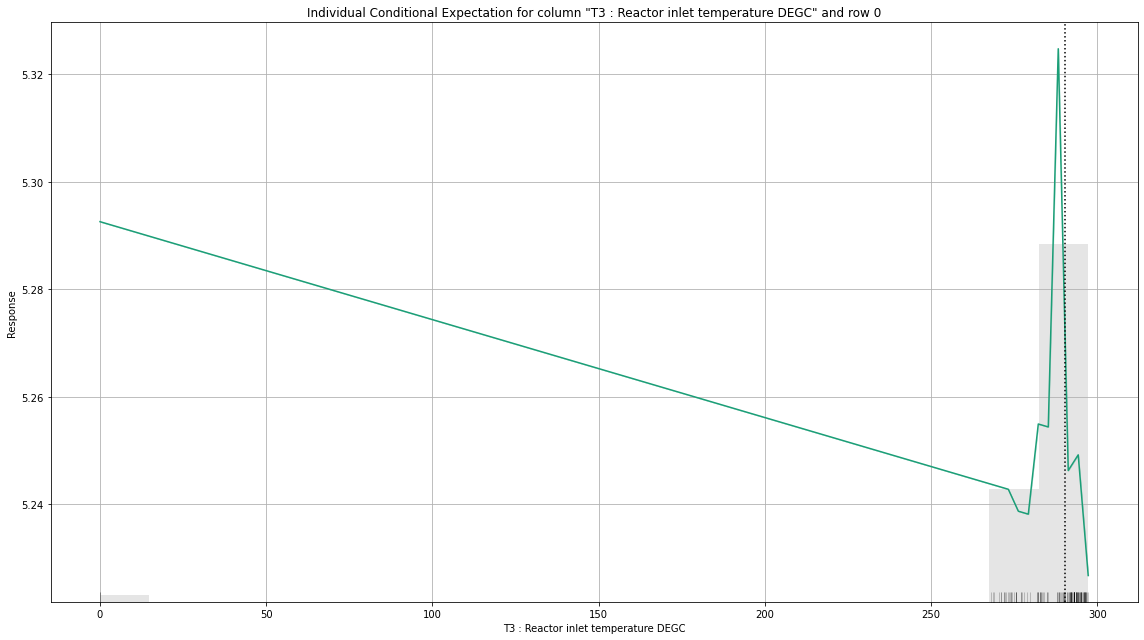

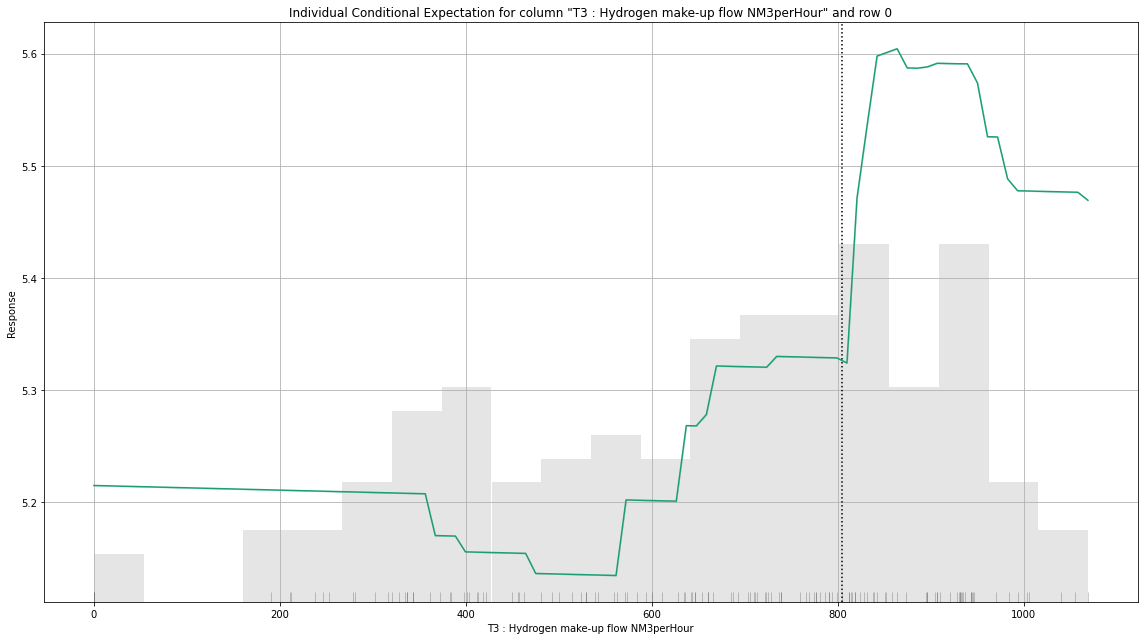

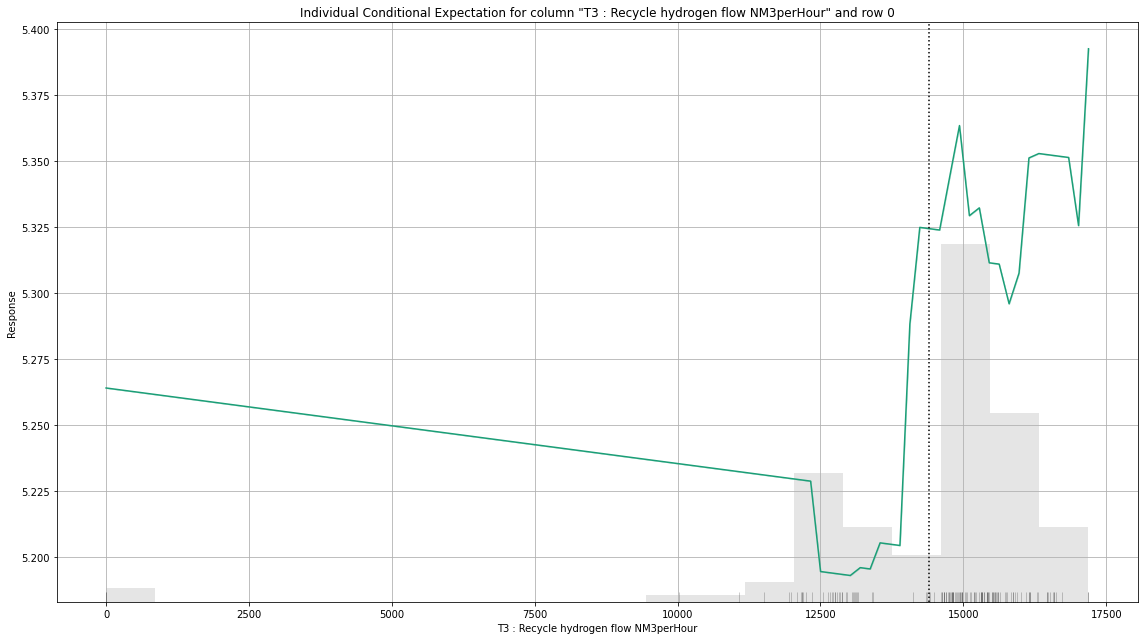

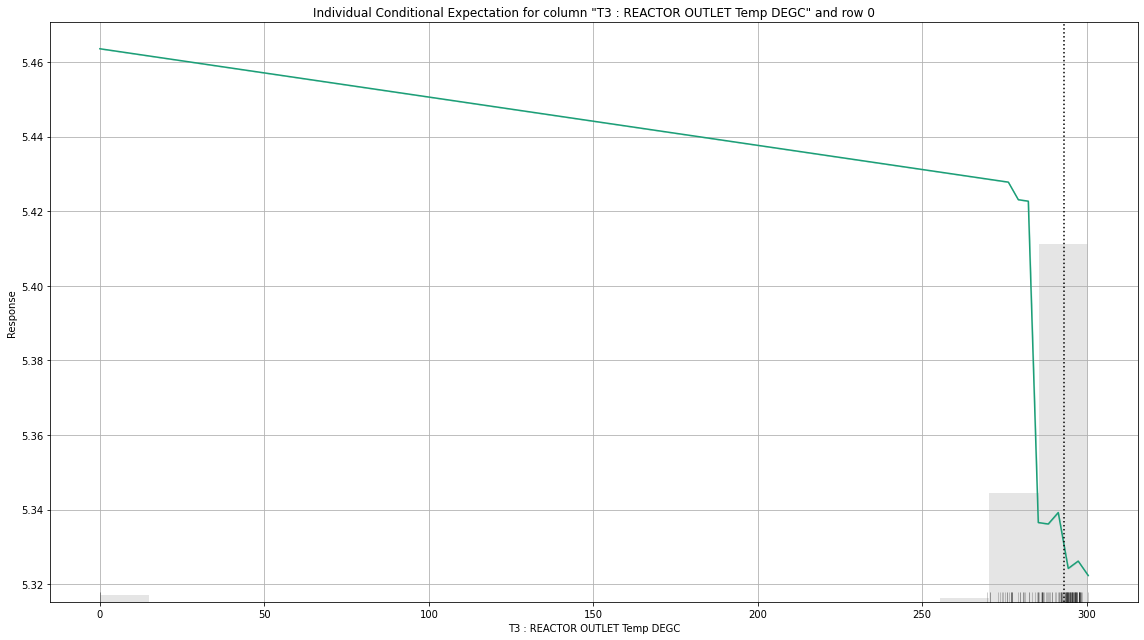

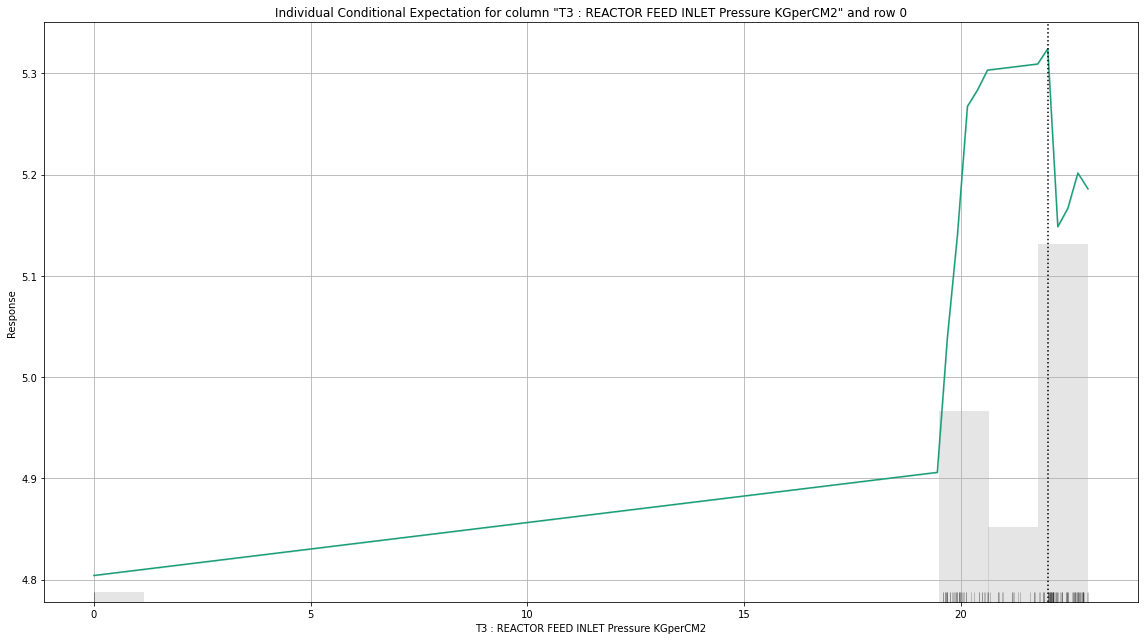

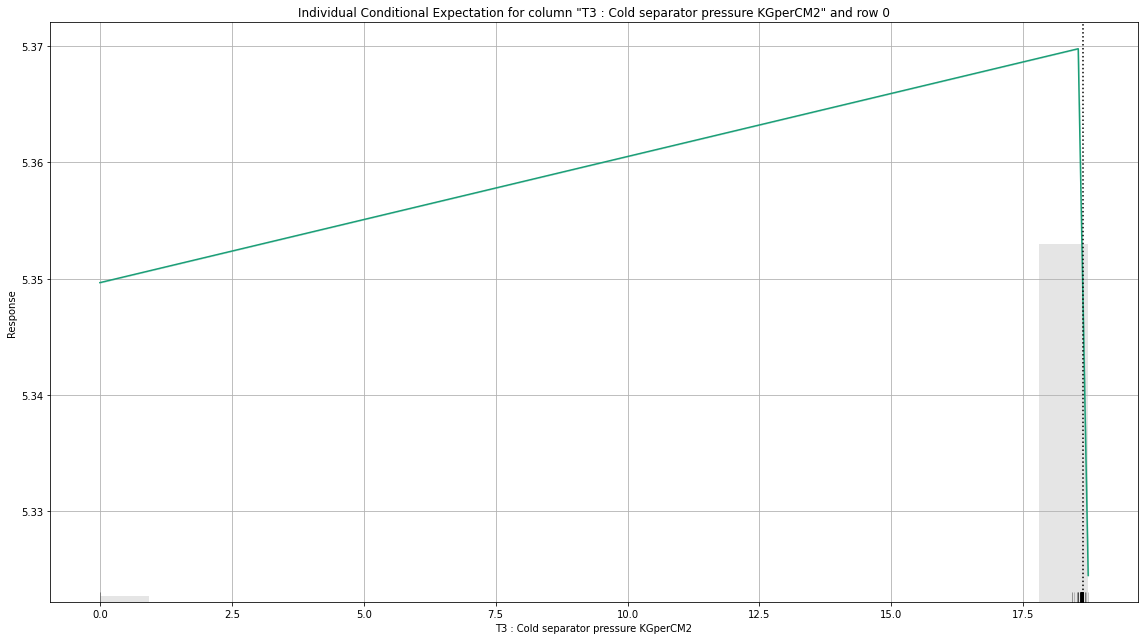

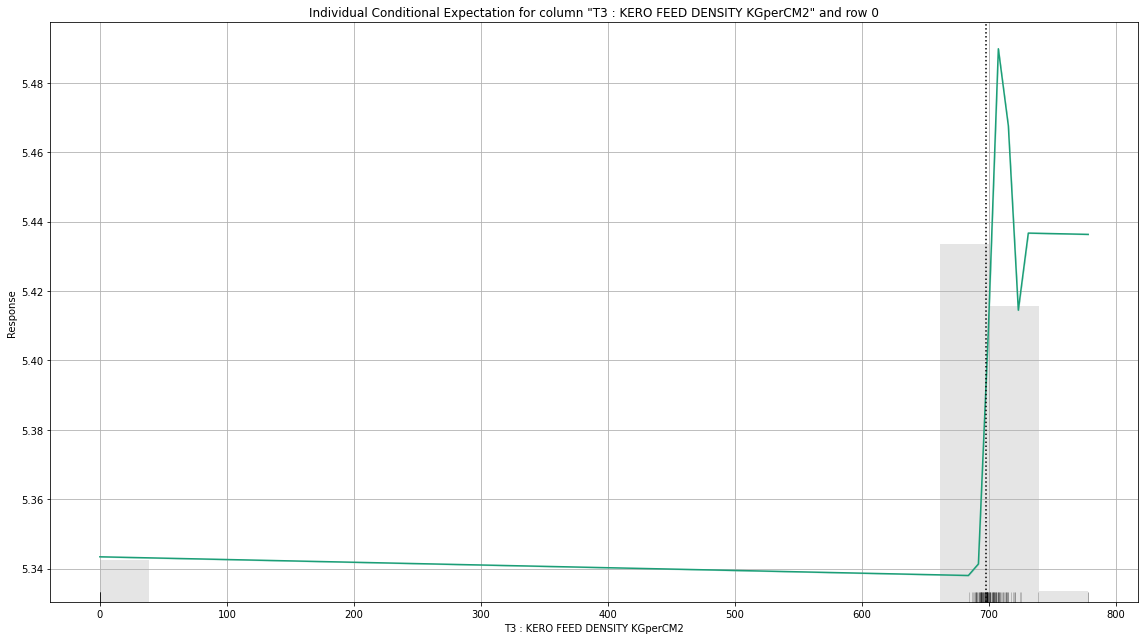

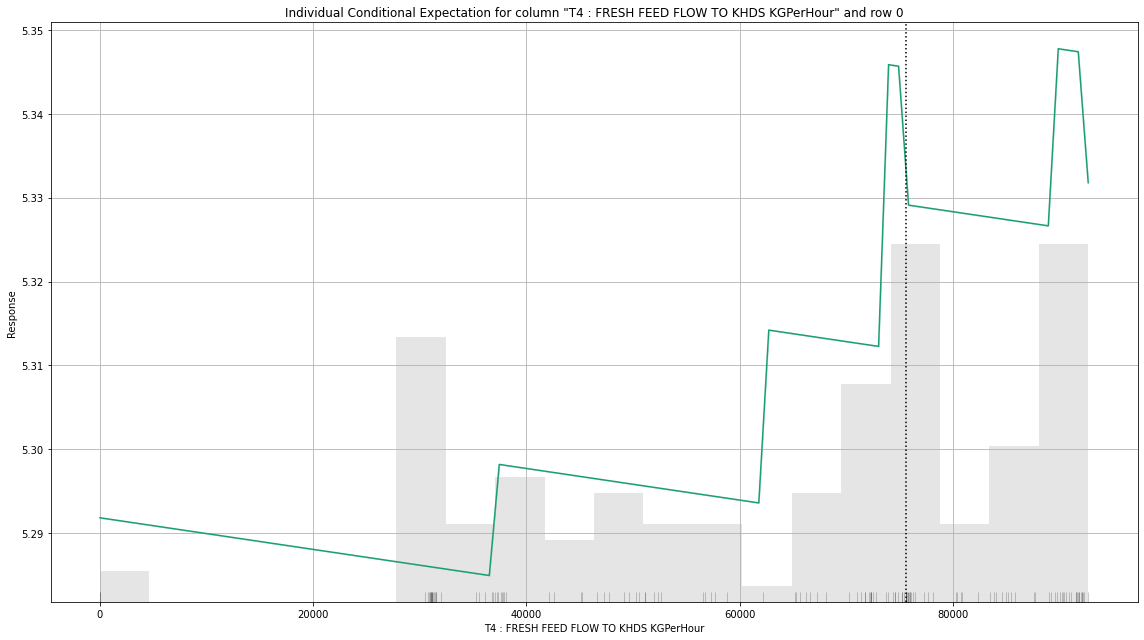

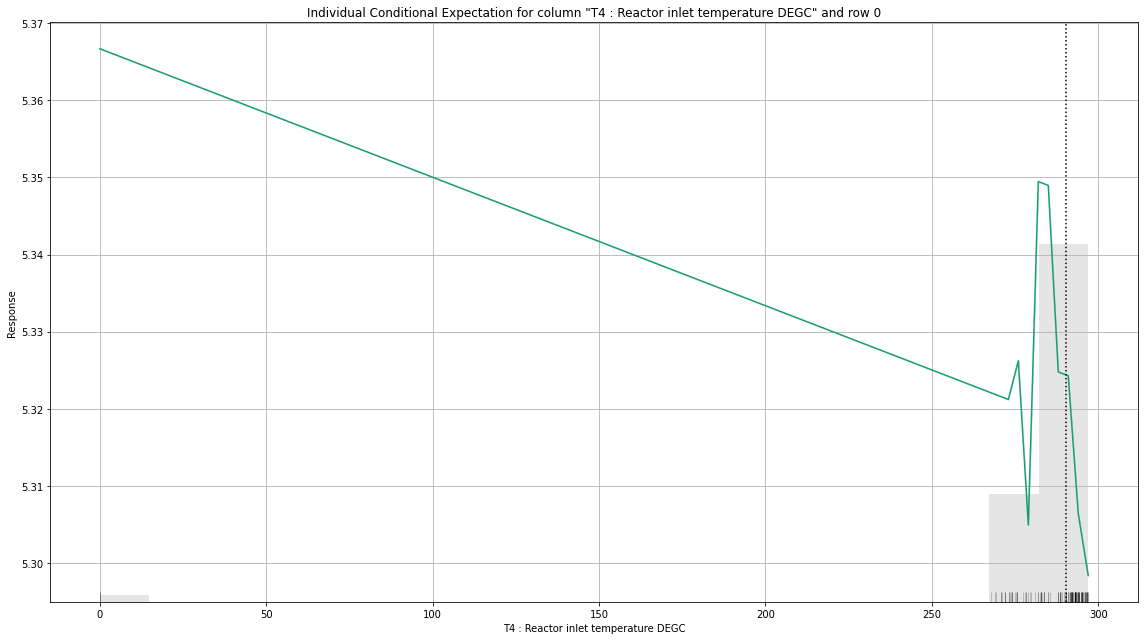

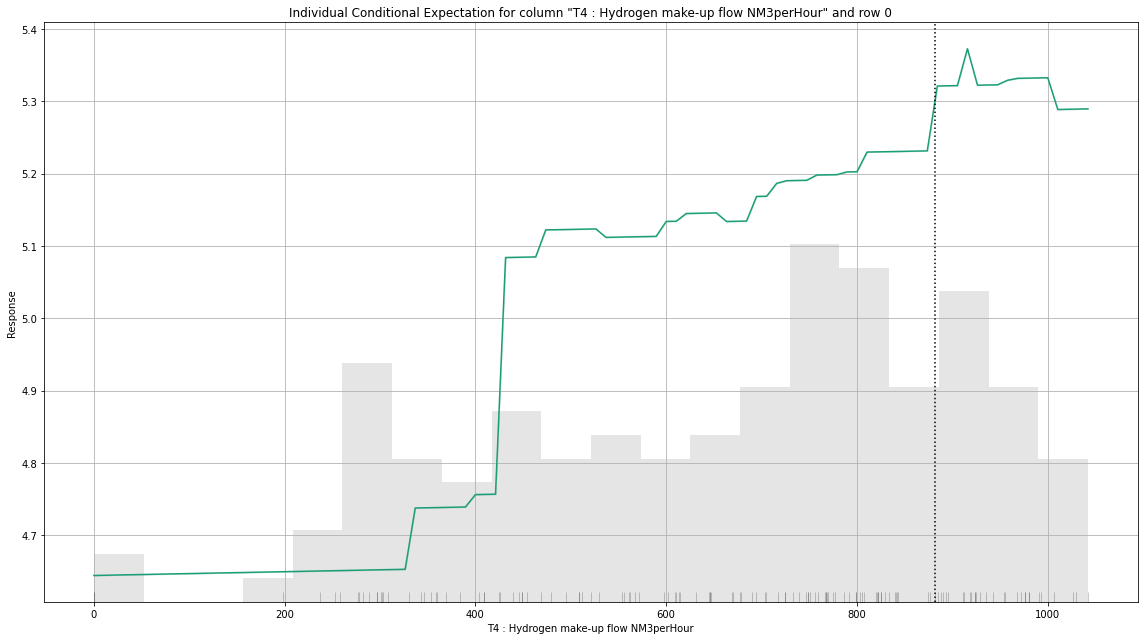

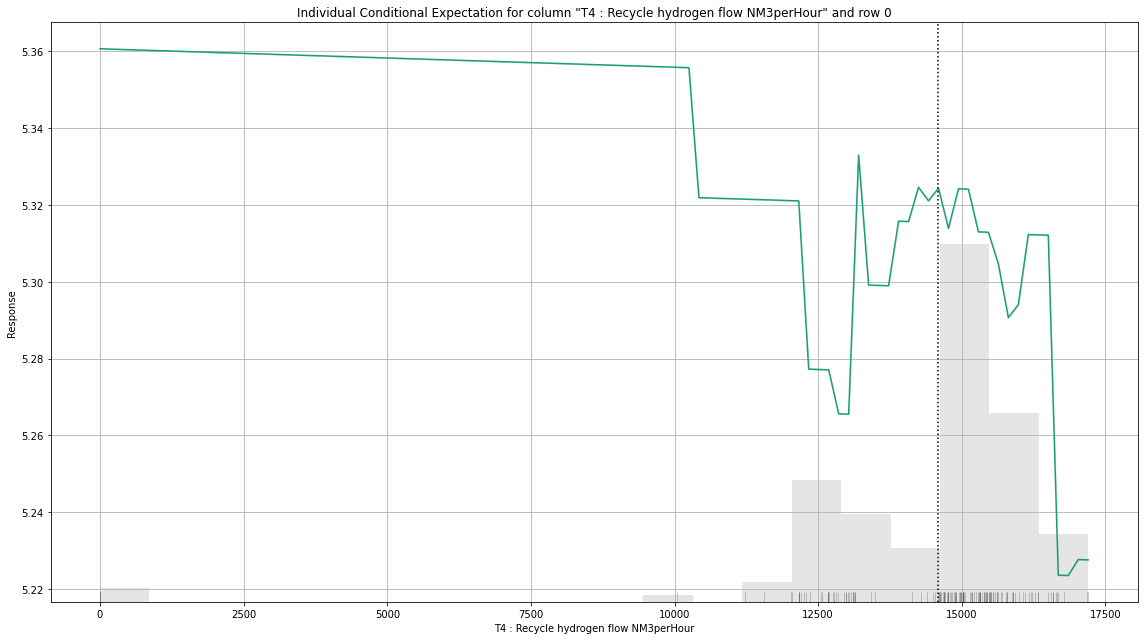

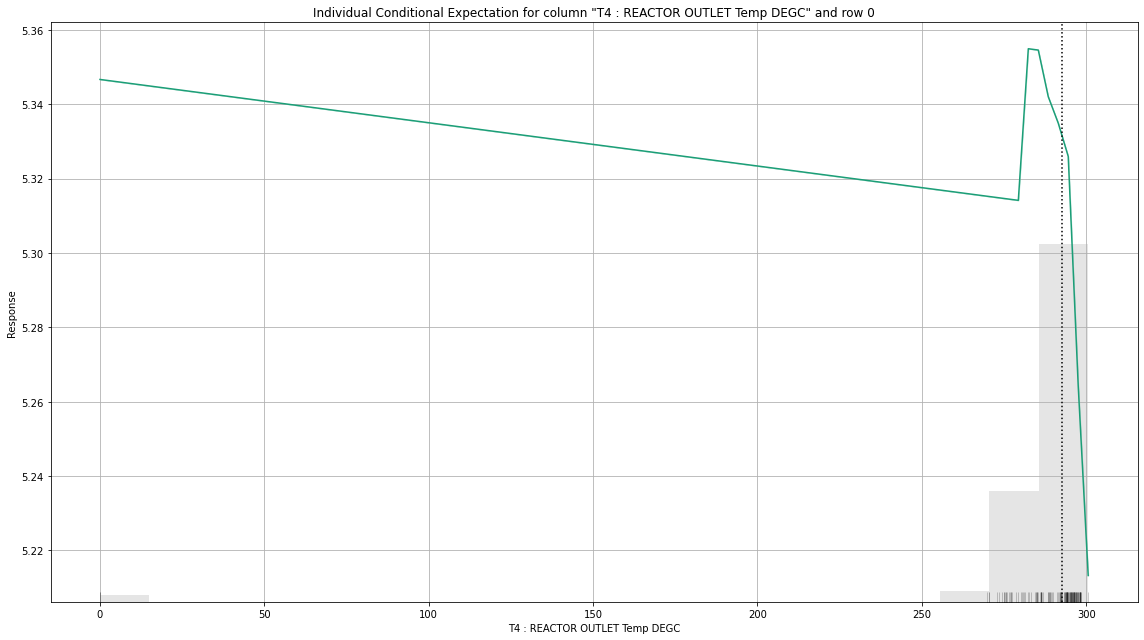

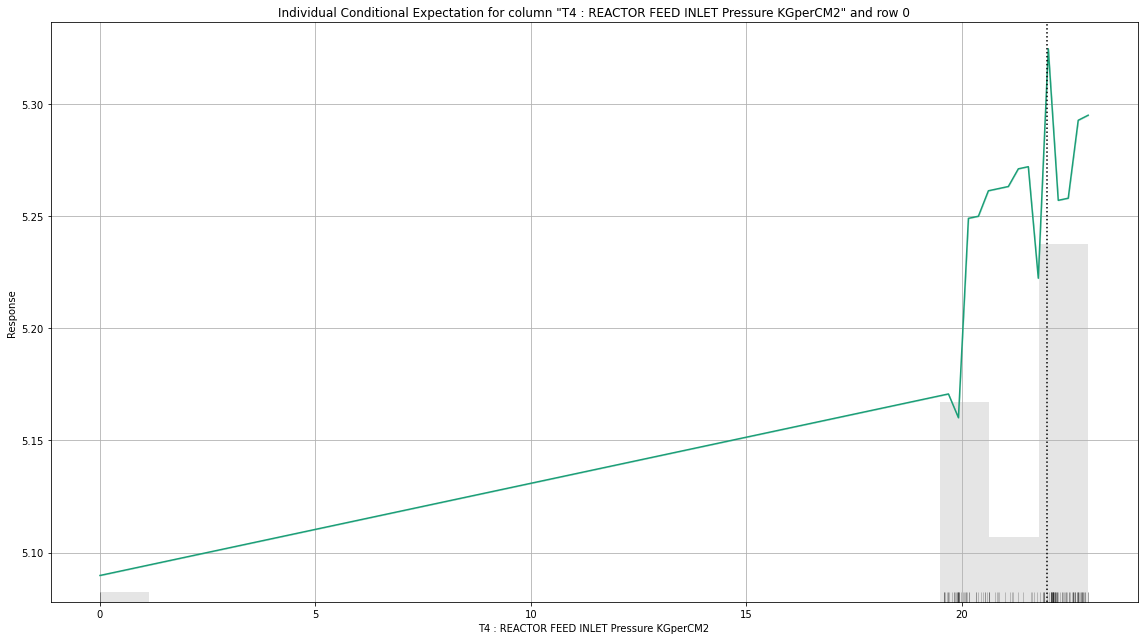

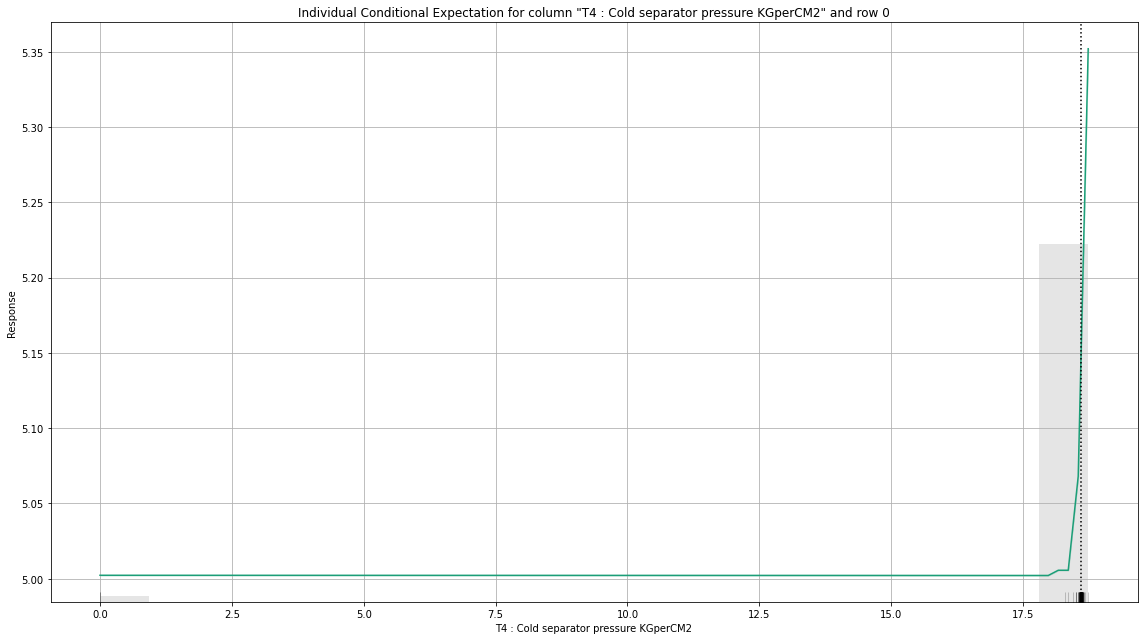

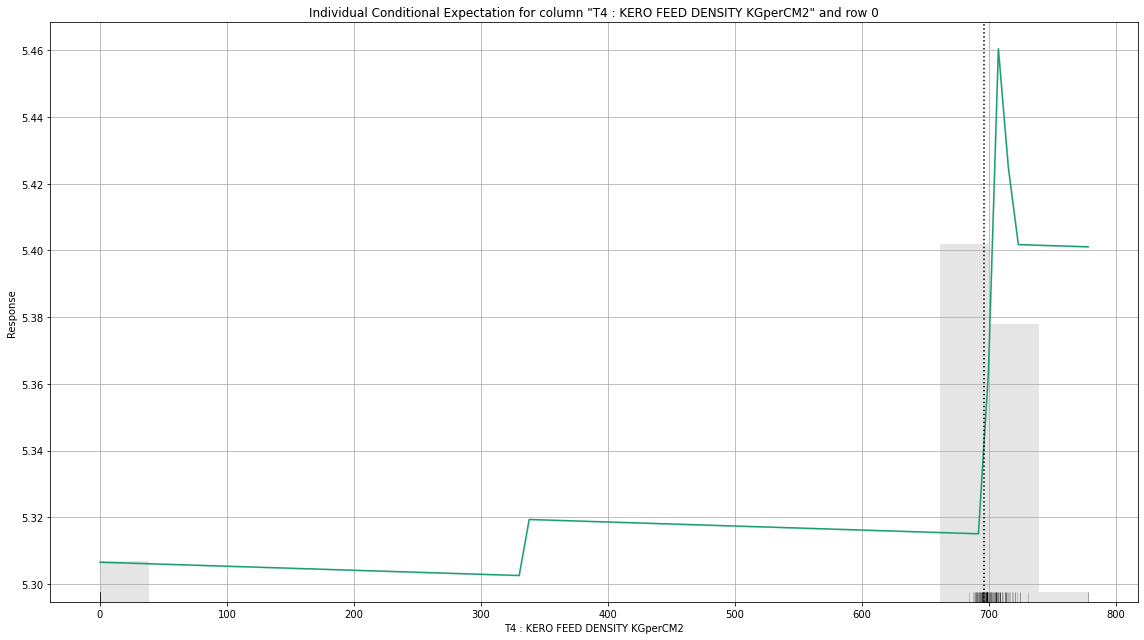

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [ ]:
# Explain first row with all AutoML models
aml.explain_row(test, row_index=0)

# Explain first row with a single H2O model (e.g. leader model from AutoML)
aml.leader.explain_row(test, row_index=0)

In [ ]:
out.default_params

{'activation': 'Rectifier',
 'adaptive_rate': True,
 'auc_type': 'AUTO',
 'autoencoder': False,
 'average_activation': 0.0,
 'balance_classes': False,
 'categorical_encoding': 'AUTO',
 'checkpoint': None,
 'class_sampling_factors': None,
 'classification_stop': 0.0,
 'col_major': False,
 'diagnostics': True,
 'distribution': 'AUTO',
 'elastic_averaging': False,
 'elastic_averaging_moving_rate': 0.9,
 'elastic_averaging_regularization': 0.001,
 'epochs': 10.0,
 'epsilon': 1e-08,
 'export_checkpoints_dir': None,
 'export_weights_and_biases': False,
 'fast_mode': True,
 'fold_assignment': 'AUTO',
 'fold_column': None,
 'force_load_balance': True,
 'hidden': [200, 200],
 'hidden_dropout_ratios': None,
 'huber_alpha': 0.9,
 'ignore_const_cols': True,
 'ignored_columns': None,
 'initial_biases': None,
 'initial_weight_distribution': 'UniformAdaptive',
 'initial_weight_scale': 1.0,
 'initial_weights': None,
 'input_dropout_ratio': 0.0,
 'keep_cross_validation_fold_assignment': False,
 'keep_c

In [ ]:
out.model_performance

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_3_AutoML_1_20220511_93953_model_1


Status of Neuron Layers: predicting Product Sulphur, regression, gaussian distribution, Quadratic loss, 23,701 weights/biases, 292.6 KB, 46,965 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,33,Input,5.0,,,,,,,,,
1,,2,100,RectifierDropout,10.0,0.0,0.0,0.006323,0.008727,0.0,0.006528,0.13228,0.476229,0.054664
2,,3,100,RectifierDropout,10.0,0.0,0.0,0.00545,0.004544,0.0,-0.011503,0.104786,0.991284,0.032594
3,,4,100,RectifierDropout,10.0,0.0,0.0,0.006503,0.011616,0.0,-0.010921,0.102213,0.986081,0.024685
4,,5,1,Linear,,0.0,0.0,0.00046,0.000413,0.0,-0.000889,0.10739,0.107078,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 9.309600903167086
RMSE: 3.051163860425573
MAE: 1.3178897499166857
RMSLE: 0.327706169149253
Mean Residual Deviance: 9.309600903167086

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 12.805186068066176
RMSE: 3.5784334656475276
MAE: 1.5356561755395013
RMSLE: 0.37276875522254027
Mean Residual Deviance: 12.805186068066176

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.512831,0.202720,1.378209,1.245958,1.540278,1.746374,1.653337
1,mean_residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
2,mse,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
3,r2,0.425399,0.161918,0.561918,0.495553,0.148003,0.430256,0.491265
4,residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
5,rmse,3.378013,1.552679,2.342752,1.909528,4.189516,2.753649,5.694621
6,rmsle,0.378259,0.037738,0.354749,0.378849,0.424169,0.403989,0.329538



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-05-11 09:49:09,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2022-05-11 09:49:10,50.544 sec,3123 obs/sec,7.507937,1,4257.0,4.534217,20.559126,2.053815,0.126172
2,,2022-05-11 09:49:16,56.406 sec,4143 obs/sec,52.657848,7,29857.0,3.387425,11.474648,1.377257,0.512291
3,,2022-05-11 09:49:19,59.656 sec,4499 obs/sec,82.830688,11,46965.0,3.051164,9.309601,1.317890,0.604312



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,T3 : Reactor inlet temperature DEGC,1.000000,1.000000,0.039276
1,T1 : Reactor inlet temperature DEGC,0.949103,0.949103,0.037277
2,T4 : Reactor inlet temperature DEGC,0.899897,0.899897,0.035344
3,T2 : REACTOR FEED INLET Pressure KGperCM2,0.887644,0.887644,0.034863
4,T3 : REACTOR OUTLET Temp DEGC,0.856817,0.856817,0.033652
5,T4 : REACTOR OUTLET Temp DEGC,0.839379,0.839379,0.032967
6,T1 : REACTOR OUTLET Temp DEGC,0.837825,0.837825,0.032906
7,T2 : Reactor inlet temperature DEGC,0.832542,0.832542,0.032699
8,T2 : Hydrogen make-up flow NM3perHour,0.822059,0.822059,0.032287
9,T2 : REACTOR OUTLET Temp DEGC,0.813328,0.813328,0.031944



See the whole table with table.as_data_frame()


<bound method ModelBase.model_performance of >

In [ ]:
out.epochs

10.0

In [ ]:
out.explain

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_3_AutoML_1_20220511_93953_model_1


Status of Neuron Layers: predicting Product Sulphur, regression, gaussian distribution, Quadratic loss, 23,701 weights/biases, 292.6 KB, 46,965 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,33,Input,5.0,,,,,,,,,
1,,2,100,RectifierDropout,10.0,0.0,0.0,0.006323,0.008727,0.0,0.006528,0.13228,0.476229,0.054664
2,,3,100,RectifierDropout,10.0,0.0,0.0,0.00545,0.004544,0.0,-0.011503,0.104786,0.991284,0.032594
3,,4,100,RectifierDropout,10.0,0.0,0.0,0.006503,0.011616,0.0,-0.010921,0.102213,0.986081,0.024685
4,,5,1,Linear,,0.0,0.0,0.00046,0.000413,0.0,-0.000889,0.10739,0.107078,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 9.309600903167086
RMSE: 3.051163860425573
MAE: 1.3178897499166857
RMSLE: 0.327706169149253
Mean Residual Deviance: 9.309600903167086

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 12.805186068066176
RMSE: 3.5784334656475276
MAE: 1.5356561755395013
RMSLE: 0.37276875522254027
Mean Residual Deviance: 12.805186068066176

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.512831,0.202720,1.378209,1.245958,1.540278,1.746374,1.653337
1,mean_residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
2,mse,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
3,r2,0.425399,0.161918,0.561918,0.495553,0.148003,0.430256,0.491265
4,residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
5,rmse,3.378013,1.552679,2.342752,1.909528,4.189516,2.753649,5.694621
6,rmsle,0.378259,0.037738,0.354749,0.378849,0.424169,0.403989,0.329538



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-05-11 09:49:09,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2022-05-11 09:49:10,50.544 sec,3123 obs/sec,7.507937,1,4257.0,4.534217,20.559126,2.053815,0.126172
2,,2022-05-11 09:49:16,56.406 sec,4143 obs/sec,52.657848,7,29857.0,3.387425,11.474648,1.377257,0.512291
3,,2022-05-11 09:49:19,59.656 sec,4499 obs/sec,82.830688,11,46965.0,3.051164,9.309601,1.317890,0.604312



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,T3 : Reactor inlet temperature DEGC,1.000000,1.000000,0.039276
1,T1 : Reactor inlet temperature DEGC,0.949103,0.949103,0.037277
2,T4 : Reactor inlet temperature DEGC,0.899897,0.899897,0.035344
3,T2 : REACTOR FEED INLET Pressure KGperCM2,0.887644,0.887644,0.034863
4,T3 : REACTOR OUTLET Temp DEGC,0.856817,0.856817,0.033652
5,T4 : REACTOR OUTLET Temp DEGC,0.839379,0.839379,0.032967
6,T1 : REACTOR OUTLET Temp DEGC,0.837825,0.837825,0.032906
7,T2 : Reactor inlet temperature DEGC,0.832542,0.832542,0.032699
8,T2 : Hydrogen make-up flow NM3perHour,0.822059,0.822059,0.032287
9,T2 : REACTOR OUTLET Temp DEGC,0.813328,0.813328,0.031944



See the whole table with table.as_data_frame()


<bound method explain of >

In [ ]:
out.ice_plot

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_3_AutoML_1_20220511_93953_model_1


Status of Neuron Layers: predicting Product Sulphur, regression, gaussian distribution, Quadratic loss, 23,701 weights/biases, 292.6 KB, 46,965 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,33,Input,5.0,,,,,,,,,
1,,2,100,RectifierDropout,10.0,0.0,0.0,0.006323,0.008727,0.0,0.006528,0.13228,0.476229,0.054664
2,,3,100,RectifierDropout,10.0,0.0,0.0,0.00545,0.004544,0.0,-0.011503,0.104786,0.991284,0.032594
3,,4,100,RectifierDropout,10.0,0.0,0.0,0.006503,0.011616,0.0,-0.010921,0.102213,0.986081,0.024685
4,,5,1,Linear,,0.0,0.0,0.00046,0.000413,0.0,-0.000889,0.10739,0.107078,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 9.309600903167086
RMSE: 3.051163860425573
MAE: 1.3178897499166857
RMSLE: 0.327706169149253
Mean Residual Deviance: 9.309600903167086

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 12.805186068066176
RMSE: 3.5784334656475276
MAE: 1.5356561755395013
RMSLE: 0.37276875522254027
Mean Residual Deviance: 12.805186068066176

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.512831,0.202720,1.378209,1.245958,1.540278,1.746374,1.653337
1,mean_residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
2,mse,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
3,r2,0.425399,0.161918,0.561918,0.495553,0.148003,0.430256,0.491265
4,residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
5,rmse,3.378013,1.552679,2.342752,1.909528,4.189516,2.753649,5.694621
6,rmsle,0.378259,0.037738,0.354749,0.378849,0.424169,0.403989,0.329538



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-05-11 09:49:09,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2022-05-11 09:49:10,50.544 sec,3123 obs/sec,7.507937,1,4257.0,4.534217,20.559126,2.053815,0.126172
2,,2022-05-11 09:49:16,56.406 sec,4143 obs/sec,52.657848,7,29857.0,3.387425,11.474648,1.377257,0.512291
3,,2022-05-11 09:49:19,59.656 sec,4499 obs/sec,82.830688,11,46965.0,3.051164,9.309601,1.317890,0.604312



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,T3 : Reactor inlet temperature DEGC,1.000000,1.000000,0.039276
1,T1 : Reactor inlet temperature DEGC,0.949103,0.949103,0.037277
2,T4 : Reactor inlet temperature DEGC,0.899897,0.899897,0.035344
3,T2 : REACTOR FEED INLET Pressure KGperCM2,0.887644,0.887644,0.034863
4,T3 : REACTOR OUTLET Temp DEGC,0.856817,0.856817,0.033652
5,T4 : REACTOR OUTLET Temp DEGC,0.839379,0.839379,0.032967
6,T1 : REACTOR OUTLET Temp DEGC,0.837825,0.837825,0.032906
7,T2 : Reactor inlet temperature DEGC,0.832542,0.832542,0.032699
8,T2 : Hydrogen make-up flow NM3perHour,0.822059,0.822059,0.032287
9,T2 : REACTOR OUTLET Temp DEGC,0.813328,0.813328,0.031944



See the whole table with table.as_data_frame()


<bound method ice_plot of >

In [ ]:
out.learning_curve_plot

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_3_AutoML_1_20220511_93953_model_1


Status of Neuron Layers: predicting Product Sulphur, regression, gaussian distribution, Quadratic loss, 23,701 weights/biases, 292.6 KB, 46,965 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,33,Input,5.0,,,,,,,,,
1,,2,100,RectifierDropout,10.0,0.0,0.0,0.006323,0.008727,0.0,0.006528,0.13228,0.476229,0.054664
2,,3,100,RectifierDropout,10.0,0.0,0.0,0.00545,0.004544,0.0,-0.011503,0.104786,0.991284,0.032594
3,,4,100,RectifierDropout,10.0,0.0,0.0,0.006503,0.011616,0.0,-0.010921,0.102213,0.986081,0.024685
4,,5,1,Linear,,0.0,0.0,0.00046,0.000413,0.0,-0.000889,0.10739,0.107078,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 9.309600903167086
RMSE: 3.051163860425573
MAE: 1.3178897499166857
RMSLE: 0.327706169149253
Mean Residual Deviance: 9.309600903167086

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 12.805186068066176
RMSE: 3.5784334656475276
MAE: 1.5356561755395013
RMSLE: 0.37276875522254027
Mean Residual Deviance: 12.805186068066176

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.512831,0.202720,1.378209,1.245958,1.540278,1.746374,1.653337
1,mean_residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
2,mse,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
3,r2,0.425399,0.161918,0.561918,0.495553,0.148003,0.430256,0.491265
4,residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
5,rmse,3.378013,1.552679,2.342752,1.909528,4.189516,2.753649,5.694621
6,rmsle,0.378259,0.037738,0.354749,0.378849,0.424169,0.403989,0.329538



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-05-11 09:49:09,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2022-05-11 09:49:10,50.544 sec,3123 obs/sec,7.507937,1,4257.0,4.534217,20.559126,2.053815,0.126172
2,,2022-05-11 09:49:16,56.406 sec,4143 obs/sec,52.657848,7,29857.0,3.387425,11.474648,1.377257,0.512291
3,,2022-05-11 09:49:19,59.656 sec,4499 obs/sec,82.830688,11,46965.0,3.051164,9.309601,1.317890,0.604312



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,T3 : Reactor inlet temperature DEGC,1.000000,1.000000,0.039276
1,T1 : Reactor inlet temperature DEGC,0.949103,0.949103,0.037277
2,T4 : Reactor inlet temperature DEGC,0.899897,0.899897,0.035344
3,T2 : REACTOR FEED INLET Pressure KGperCM2,0.887644,0.887644,0.034863
4,T3 : REACTOR OUTLET Temp DEGC,0.856817,0.856817,0.033652
5,T4 : REACTOR OUTLET Temp DEGC,0.839379,0.839379,0.032967
6,T1 : REACTOR OUTLET Temp DEGC,0.837825,0.837825,0.032906
7,T2 : Reactor inlet temperature DEGC,0.832542,0.832542,0.032699
8,T2 : Hydrogen make-up flow NM3perHour,0.822059,0.822059,0.032287
9,T2 : REACTOR OUTLET Temp DEGC,0.813328,0.813328,0.031944



See the whole table with table.as_data_frame()


<bound method learning_curve_plot of >

In [ ]:
out.mse

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_3_AutoML_1_20220511_93953_model_1


Status of Neuron Layers: predicting Product Sulphur, regression, gaussian distribution, Quadratic loss, 23,701 weights/biases, 292.6 KB, 46,965 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,33,Input,5.0,,,,,,,,,
1,,2,100,RectifierDropout,10.0,0.0,0.0,0.006323,0.008727,0.0,0.006528,0.13228,0.476229,0.054664
2,,3,100,RectifierDropout,10.0,0.0,0.0,0.00545,0.004544,0.0,-0.011503,0.104786,0.991284,0.032594
3,,4,100,RectifierDropout,10.0,0.0,0.0,0.006503,0.011616,0.0,-0.010921,0.102213,0.986081,0.024685
4,,5,1,Linear,,0.0,0.0,0.00046,0.000413,0.0,-0.000889,0.10739,0.107078,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 9.309600903167086
RMSE: 3.051163860425573
MAE: 1.3178897499166857
RMSLE: 0.327706169149253
Mean Residual Deviance: 9.309600903167086

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 12.805186068066176
RMSE: 3.5784334656475276
MAE: 1.5356561755395013
RMSLE: 0.37276875522254027
Mean Residual Deviance: 12.805186068066176

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.512831,0.202720,1.378209,1.245958,1.540278,1.746374,1.653337
1,mean_residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
2,mse,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
3,r2,0.425399,0.161918,0.561918,0.495553,0.148003,0.430256,0.491265
4,residual_deviance,13.339622,11.946567,5.488487,3.646299,17.552038,7.582580,32.428703
5,rmse,3.378013,1.552679,2.342752,1.909528,4.189516,2.753649,5.694621
6,rmsle,0.378259,0.037738,0.354749,0.378849,0.424169,0.403989,0.329538



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-05-11 09:49:09,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2022-05-11 09:49:10,50.544 sec,3123 obs/sec,7.507937,1,4257.0,4.534217,20.559126,2.053815,0.126172
2,,2022-05-11 09:49:16,56.406 sec,4143 obs/sec,52.657848,7,29857.0,3.387425,11.474648,1.377257,0.512291
3,,2022-05-11 09:49:19,59.656 sec,4499 obs/sec,82.830688,11,46965.0,3.051164,9.309601,1.317890,0.604312



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,T3 : Reactor inlet temperature DEGC,1.000000,1.000000,0.039276
1,T1 : Reactor inlet temperature DEGC,0.949103,0.949103,0.037277
2,T4 : Reactor inlet temperature DEGC,0.899897,0.899897,0.035344
3,T2 : REACTOR FEED INLET Pressure KGperCM2,0.887644,0.887644,0.034863
4,T3 : REACTOR OUTLET Temp DEGC,0.856817,0.856817,0.033652
5,T4 : REACTOR OUTLET Temp DEGC,0.839379,0.839379,0.032967
6,T1 : REACTOR OUTLET Temp DEGC,0.837825,0.837825,0.032906
7,T2 : Reactor inlet temperature DEGC,0.832542,0.832542,0.032699
8,T2 : Hydrogen make-up flow NM3perHour,0.822059,0.822059,0.032287
9,T2 : REACTOR OUTLET Temp DEGC,0.813328,0.813328,0.031944



See the whole table with table.as_data_frame()


<bound method ModelBase.mse of >

In [ ]:
out.loss

'automatic'

Now test with lesser data from Real test file which has earlier 52 data point. Now all higher than 20 r removed from test data & then check result.

In [ ]:
uploaded2 = files.upload()

Saving KHDS_TestData_12Apr_rev_2.csv to KHDS_TestData_12Apr_rev_2.csv


KHDS_TestData_12Apr_rev_2.csv has all values of y = Product Sulphur < = 20.
All values above 20 from KHDS_TestData_12Apr_rev_1.csv is discarded in 2.

In [ ]:
for fn in uploaded2.keys():
  print('User uploaded2 file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded2[fn])))

User uploaded2 file "KHDS_TestData_12Apr_rev_2.csv" with length 16352 bytes


In [ ]:
new_observations_2 = h2o.import_file(path='KHDS_TestData_12Apr_rev_2.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
predictions_2 = imported_model.predict(new_observations_2)

generic prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
predictions_2.head(52)

predict
5.87018
8.90026
6.88386
4.39423
7.66599
7.46432
6.86446
8.12997
4.04345
4.21162
